# 股票各項指標的計算、應用與繪圖（含Talib 套件）

### 賴志宏、薛祖恩 

建檔日期：2020.08.11  最後修改日期：2020.12.17 

# 內容介紹：
## Part 1 繪製圖形

* (1) 資料讀取與整理
* (2) 移動平均線 / K線圖
    * 介紹定義與公式
    * 自製移動平均線
* (3) 自定義圖形
    * 自定義寫法 1
    * 自定義寫法 2
* (4) MACD指標
    * 介紹定義與公式
    * 內建計算方式
* (5) RSI指標
    * 介紹定義與公式
    * 自製RSI線
* (6) 布林通道
    * 介紹定義與公式
    * 內建計算方式
* (7) KD指標
    * 介紹定義與公式
    * 自製KD線
* (8) 如何標記點
    * 標點範例
* (9) Talib 套件： 金融領域的指標套件

-------------------------------------------------------------------------------------------------------------------------------

# 1-1 繪製圖形 - 資料讀取與整理

In [2]:
import pandas as pd

#讀資料 (亞信3169) 2015年 - 2019年
stocks = pd.read_csv('stocks_3169.csv')

#印出資料(日期、開盤價、最高價、最低價、收盤價、成交量)
print(stocks)

            Date   Open   High    Low  Close  Volumn
0     2015/01/05  36.10  36.70  35.90  36.55    1367
1     2015/01/06  36.40  37.05  36.00  36.35    1272
2     2015/01/07  36.50  37.00  36.20  36.55    1038
3     2015/01/08  36.80  36.90  35.75  36.30     975
4     2015/01/09  36.50  36.75  36.15  36.15     767
...          ...    ...    ...    ...    ...     ...
1218  2019/12/25  36.45  37.40  36.40  37.30     249
1219  2019/12/26  37.30  38.15  37.00  38.10     357
1220  2019/12/27  37.85  38.40  37.55  38.10     246
1221  2019/12/30  38.15  38.90  37.90  37.90     280
1222  2019/12/31  37.90  38.10  37.60  37.95      95

[1223 rows x 6 columns]


In [11]:
import pandas as pd

#讀資料 (亞信3169) 2015年 - 2019年
stocks = pd.read_csv('stocks_3169.csv')

#印出資料(日期、開盤價、最高價、最低價、收盤價、成交量)
print(stocks)

#整理以及排列資料 1
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

#印出整理後的資料
print(stocks)

            Date   Open   High    Low  Close  Volumn
0     2015/01/05  36.10  36.70  35.90  36.55    1367
1     2015/01/06  36.40  37.05  36.00  36.35    1272
2     2015/01/07  36.50  37.00  36.20  36.55    1038
3     2015/01/08  36.80  36.90  35.75  36.30     975
4     2015/01/09  36.50  36.75  36.15  36.15     767
...          ...    ...    ...    ...    ...     ...
1218  2019/12/25  36.45  37.40  36.40  37.30     249
1219  2019/12/26  37.30  38.15  37.00  38.10     357
1220  2019/12/27  37.85  38.40  37.55  38.10     246
1221  2019/12/30  38.15  38.90  37.90  37.90     280
1222  2019/12/31  37.90  38.10  37.60  37.95      95

[1223 rows x 6 columns]
                  Date   Open   High    Low  Close  Volumn
Date                                                      
2015-01-05  2015/01/05  36.10  36.70  35.90  36.55    1367
2015-01-06  2015/01/06  36.40  37.05  36.00  36.35    1272
2015-01-07  2015/01/07  36.50  37.00  36.20  36.55    1038
2015-01-08  2015/01/08  36.80  36.90  35.75 

In [7]:
import pandas as pd

#讀資料 (亞信3169) 2015年 - 2019年
stocks = pd.read_csv('stocks_3169.csv')

#印出資料(日期、開盤價、最高價、最低價、收盤價、成交量)
print(stocks)

#整理以及排列資料 1
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")

#印出整理後的資料
print(stocks)

#整理以及排列資料 2
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

#印出整理後的資料
print(stocks)

            Date   Open   High    Low  Close  Volume
0       5/1/2015  36.10  36.70  35.90  36.55    1367
1       6/1/2015  36.40  37.05  36.00  36.35    1272
2       7/1/2015  36.50  37.00  36.20  36.55    1038
3       8/1/2015  36.80  36.90  35.75  36.30     975
4       9/1/2015  36.50  36.75  36.15  36.15     767
...          ...    ...    ...    ...    ...     ...
1218  25/12/2019  36.45  37.40  36.40  37.30     249
1219  26/12/2019  37.30  38.15  37.00  38.10     357
1220  27/12/2019  37.85  38.40  37.55  38.10     246
1221  30/12/2019  38.15  38.90  37.90  37.90     280
1222  31/12/2019  37.90  38.10  37.60  37.95      95

[1223 rows x 6 columns]
           Date   Open   High    Low  Close  Volume
0    2015-01-05  36.10  36.70  35.90  36.55    1367
1    2015-01-06  36.40  37.05  36.00  36.35    1272
2    2015-01-07  36.50  37.00  36.20  36.55    1038
3    2015-01-08  36.80  36.90  35.75  36.30     975
4    2015-01-09  36.50  36.75  36.15  36.15     767
...         ...    ...    .

In [65]:
import pandas as pd

#讀資料 (亞信3169)
stocks = pd.read_csv('stocks_3169.csv')

#整理以及排列資料 
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

#取最新100筆資料
stocks.tail(100)

#印出資料
print(stocks)

                 Date   Open   High    Low  Close  Volume
Date                                                     
2015-01-05 2015-01-05  36.10  36.70  35.90  36.55    1367
2015-01-06 2015-01-06  36.40  37.05  36.00  36.35    1272
2015-01-07 2015-01-07  36.50  37.00  36.20  36.55    1038
2015-01-08 2015-01-08  36.80  36.90  35.75  36.30     975
2015-01-09 2015-01-09  36.50  36.75  36.15  36.15     767
...               ...    ...    ...    ...    ...     ...
2019-12-25 2019-12-25  36.45  37.40  36.40  37.30     249
2019-12-26 2019-12-26  37.30  38.15  37.00  38.10     357
2019-12-27 2019-12-27  37.85  38.40  37.55  38.10     246
2019-12-30 2019-12-30  38.15  38.90  37.90  37.90     280
2019-12-31 2019-12-31  37.90  38.10  37.60  37.95      95

[1223 rows x 6 columns]


-------------------------------------------------------------------------------------------------------------------------------

# 1-2 繪製圖形 - 移動平均線 / K線圖
## 移動平均線定義：過去某段時間裡的平均成交價格
## 移動平均線公式：過去N天的收盤價加總除以N

## 1-2-1 移動平均線 計算與繪圖

In [8]:
import mplfinance as mpf

#mpf內建可使用繪圖風格
print(mpf.available_styles())

['binance', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'yahoo']


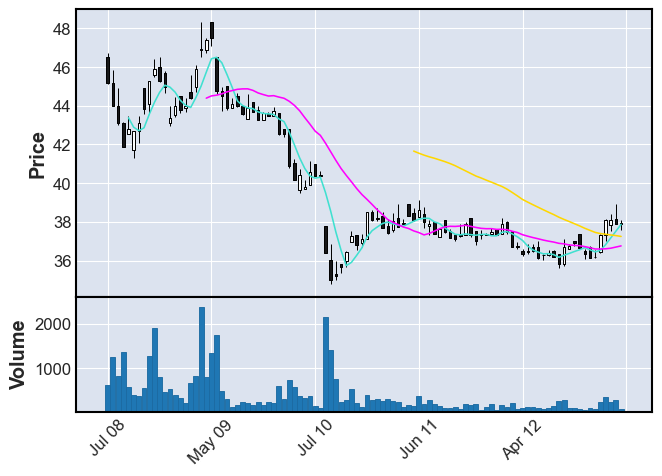

In [1]:
import pandas as pd
import mplfinance as mpf

#讀資料 (亞信3169)
stocks = pd.read_csv('stocks_3169.csv')

#整理以及排列資料 
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")

#取最新100筆資料
stocks = stocks.tail(100)

#繪圖 (股票資料、印出成交量、設定風格(蠟燭圖)、移動平均線(5, 20, 60))
mpf.plot(stocks, volume = True, type = 'candle', mav = (5, 20, 60))

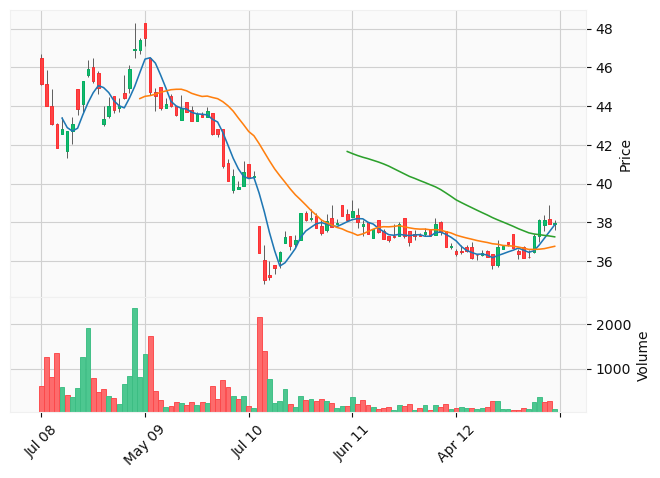

In [4]:
mpf.plot(stocks, volume = True, type = 'candle', style = 'yahoo', mav = (5, 20, 60))

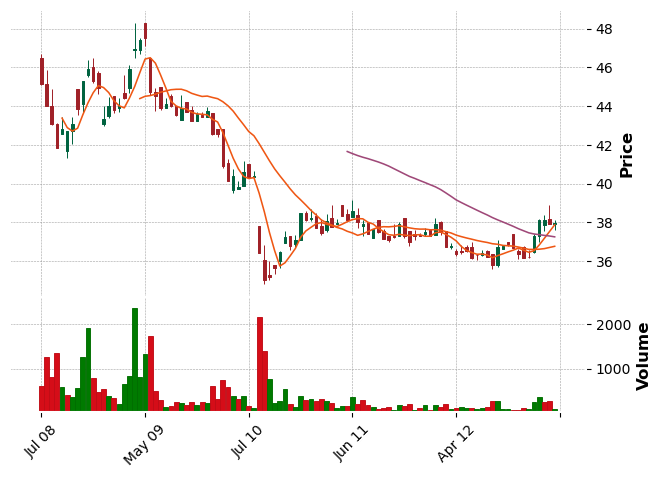

In [5]:
mpf.plot(stocks, volume = True, type = 'candle', style = 'charles', mav = (5, 20, 60))

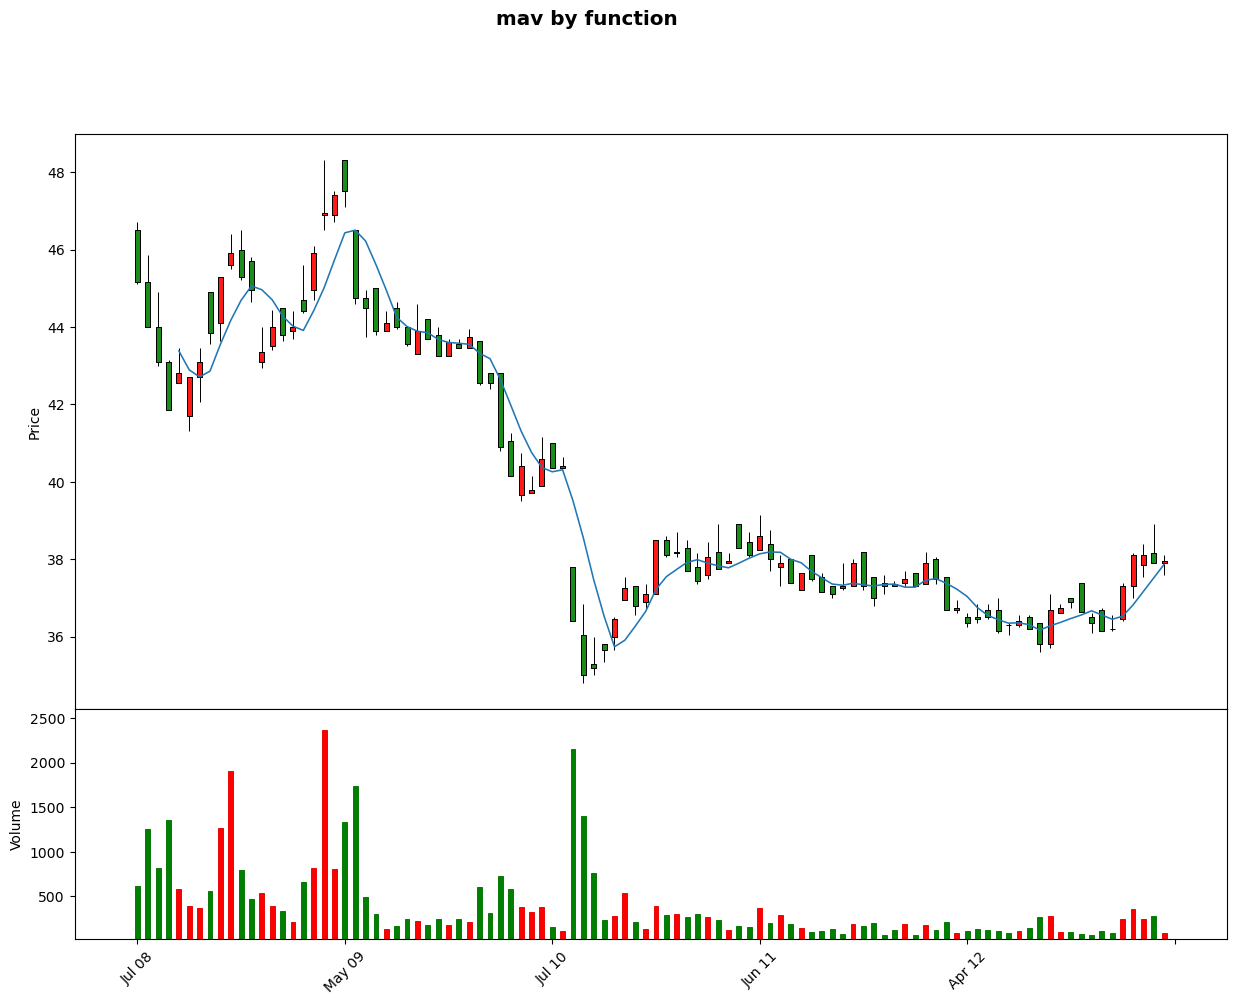

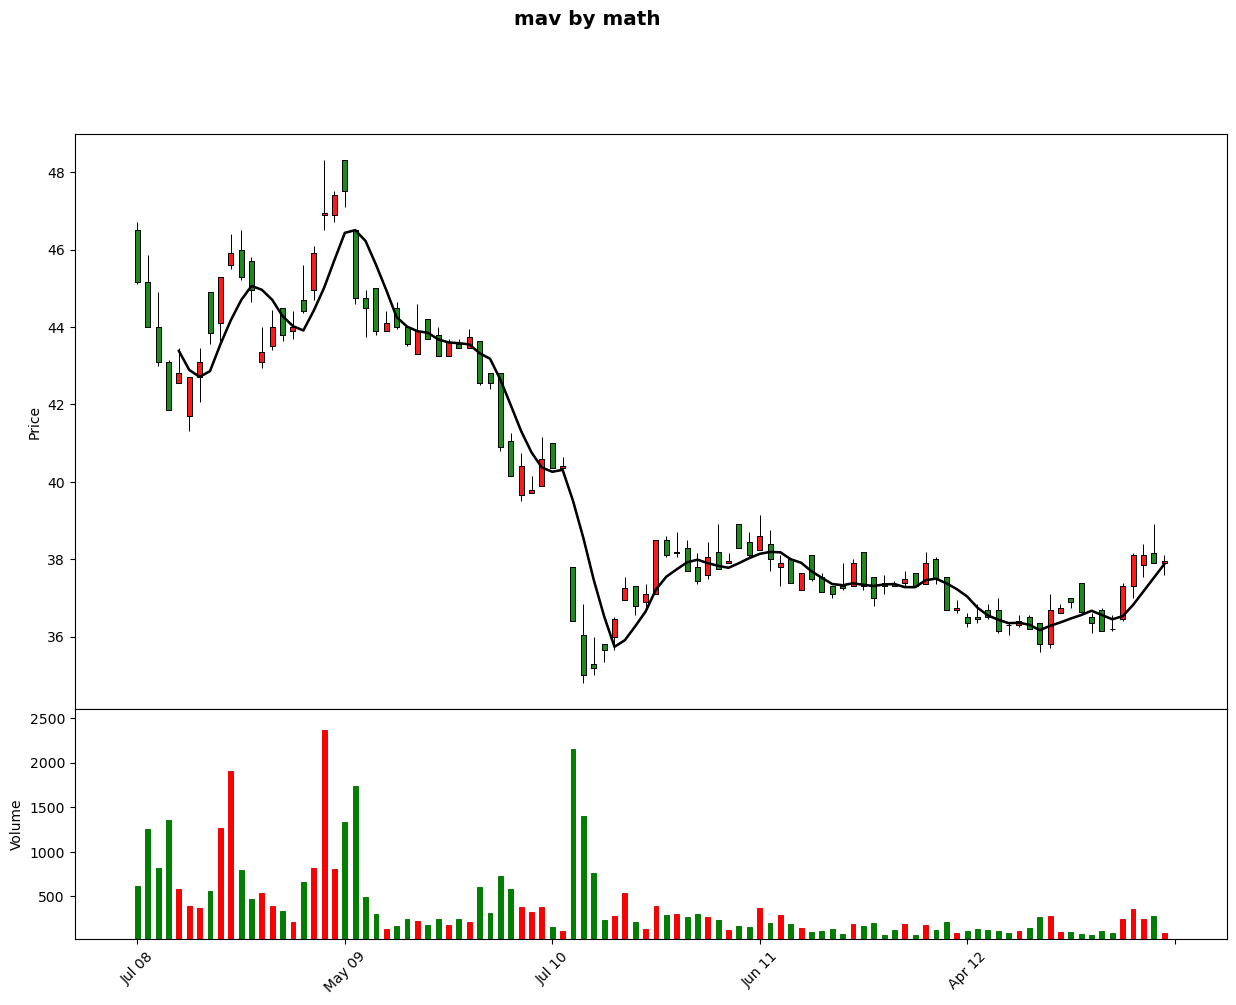

In [56]:
#使用數學方式計算 5日線
import numpy as np
import pandas as pd
import mplfinance as mpf

#讀資料 (亞信3169) 20150105-20191231
stocks = pd.read_csv('stocks_3169.csv')

#整理以及排列資料 
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")

#取最新100筆資料
stocks = stocks.tail(100)

#自定義
#紅漲綠跌 (更改顏色)
colorSet = mpf.make_marketcolors(up = 'r', down = 'g', volume = 'inherit')

#style也要一起做更改
styleSet = mpf.make_mpf_style(marketcolors = colorSet)

#kwargs
kwargs = dict(type = 'candle', mav = 5, volume = True, figscale = 2,\
              style = styleSet, scale_width_adjustment = dict(volume = 0.5))

#繪圖 (上方的圖)
mpf.plot(stocks, **kwargs, title = 'mav by function')

#############################################################################

#stocks_close是近 100天收盤價的 list
stocks_close = [line for line in stocks['Close']]

#宣告陣列放置 5日線之值，前四個為 np.nan
five_mav = [np.nan] * 4

#計算五日平均線
for i in range(4, len(stocks_close)):
    five_mav.append( sum( stocks_close[ i-4 : i+1 ]) / 5 )

#使用 addplot
five = mpf.make_addplot(five_mav, color = 'black')

#將自製 5日線匯出 (下方的圖)
mpf.plot(stocks, **kwargs, addplot = five, title = 'mav by math')

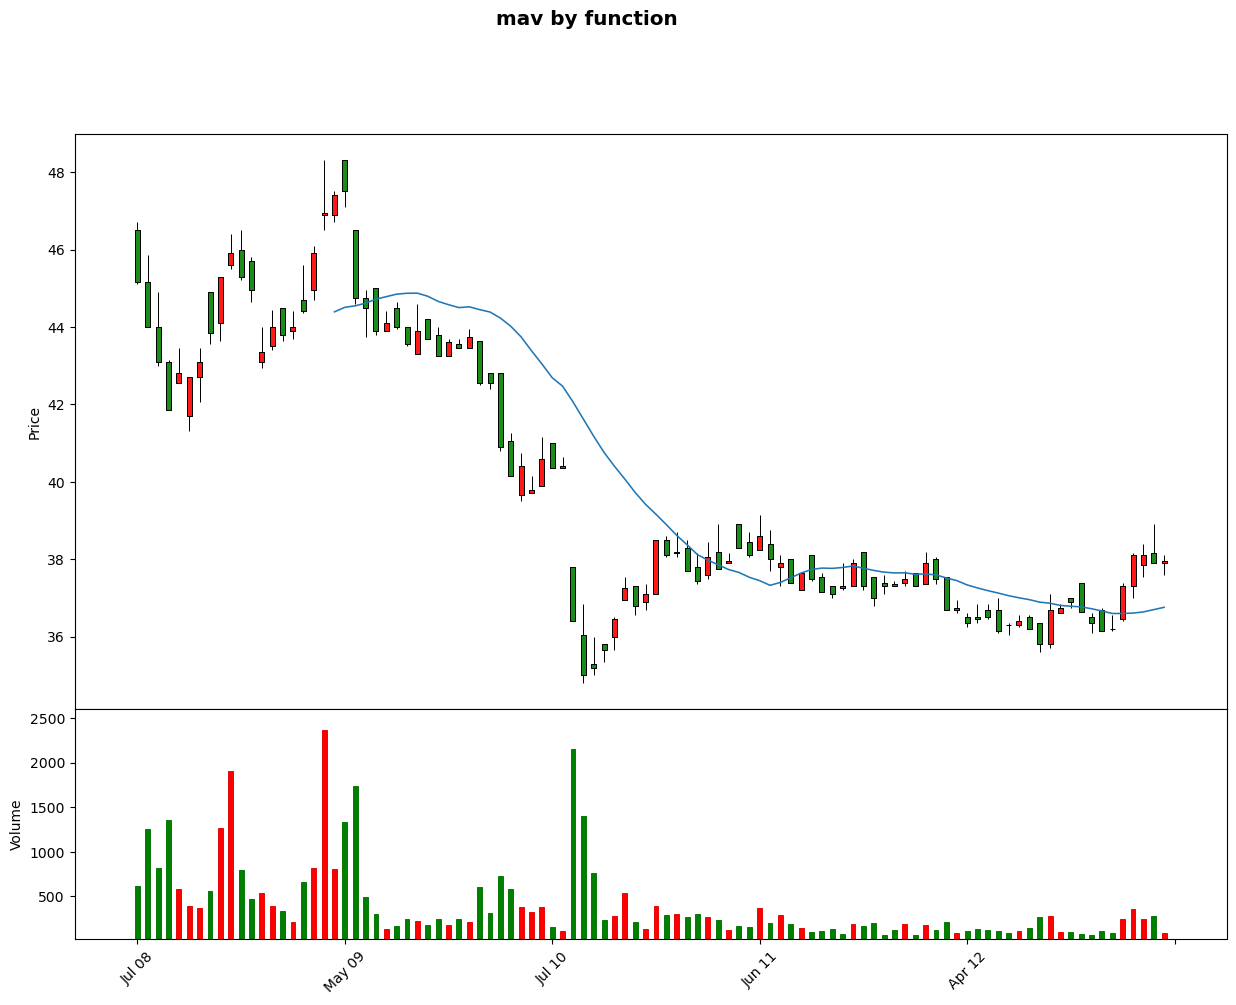

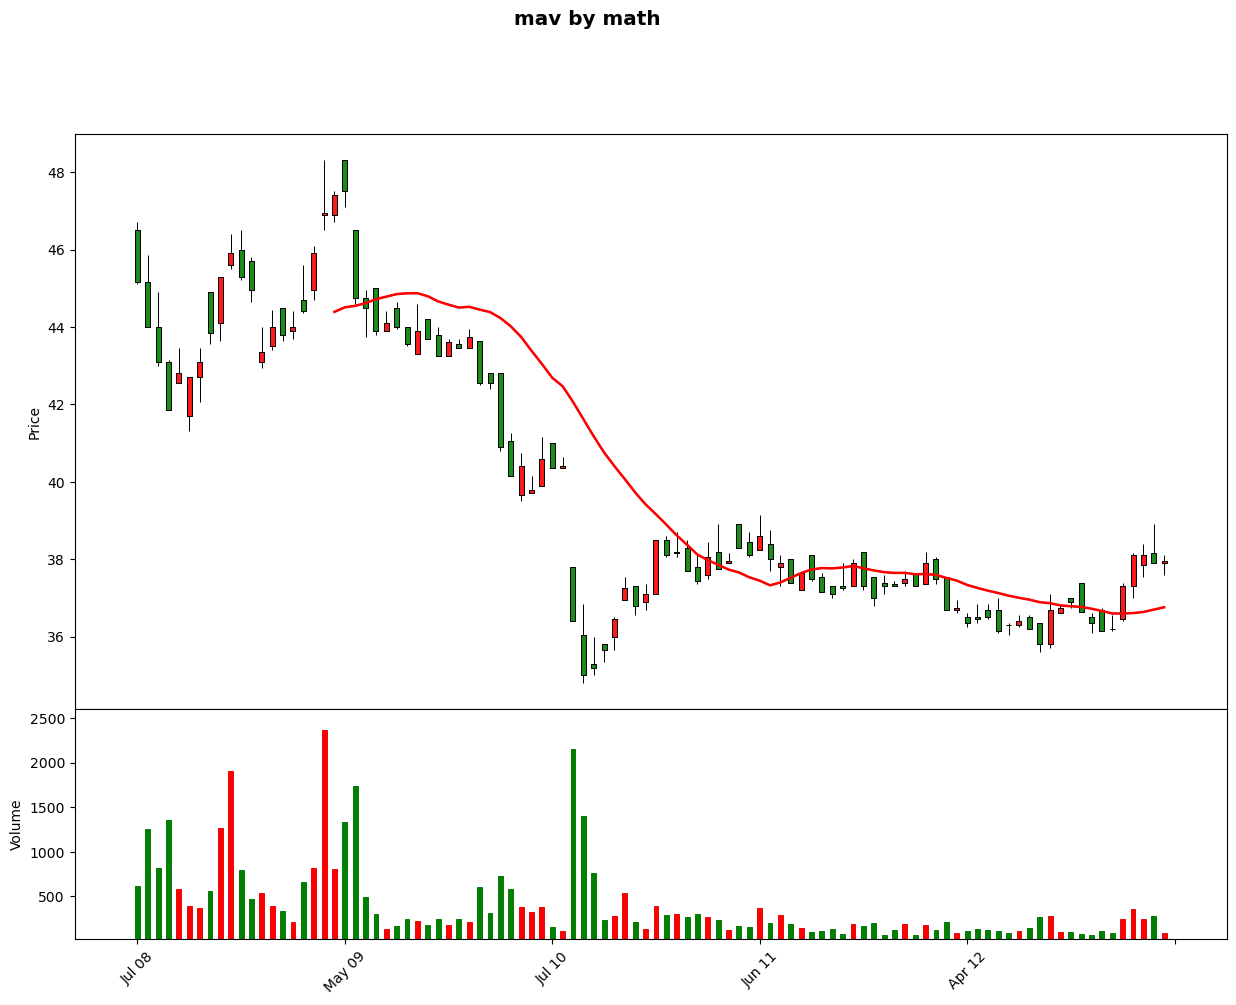

In [57]:
#使用數學方式計算 20日線
import numpy as np
import pandas as pd
import mplfinance as mpf

#讀資料 (亞信3169) 20150105-20191231
stocks = pd.read_csv('stocks_3169.csv')

#整理以及排列資料 
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")

#取最新100筆資料
stocks = stocks.tail(100)

#客製化
#紅漲綠跌 (更改顏色)
colorSet = mpf.make_marketcolors(up = 'r', down = 'g', volume = 'inherit')

#style也要一起做更改
styleSet = mpf.make_mpf_style(marketcolors = colorSet)

#kwargs
kwargs = dict(type = 'candle', mav = 20, volume = True, figscale = 2,\
              style = styleSet, scale_width_adjustment = dict(volume = 0.5))

#繪圖 (上方的圖)
mpf.plot(stocks, **kwargs, title = 'mav by function')

#############################################################################

#stocks_close是進 100天收盤價的 list
stocks_close = [line for line in stocks['Close']]

#宣告陣列放置 20日線之值
twenty_mav = [np.nan] * 19

#計算二十日平均
for i in range(19, len(stocks_close)):
    twenty_mav.append( sum( stocks_close[i-19 : i+1]) / 20 )

#使用 addplot
twenty = mpf.make_addplot(twenty_mav, color = 'red')

#將自製 20日線匯出 (下方的圖)
mpf.plot(stocks, **kwargs, addplot = twenty, title = 'mav by math')

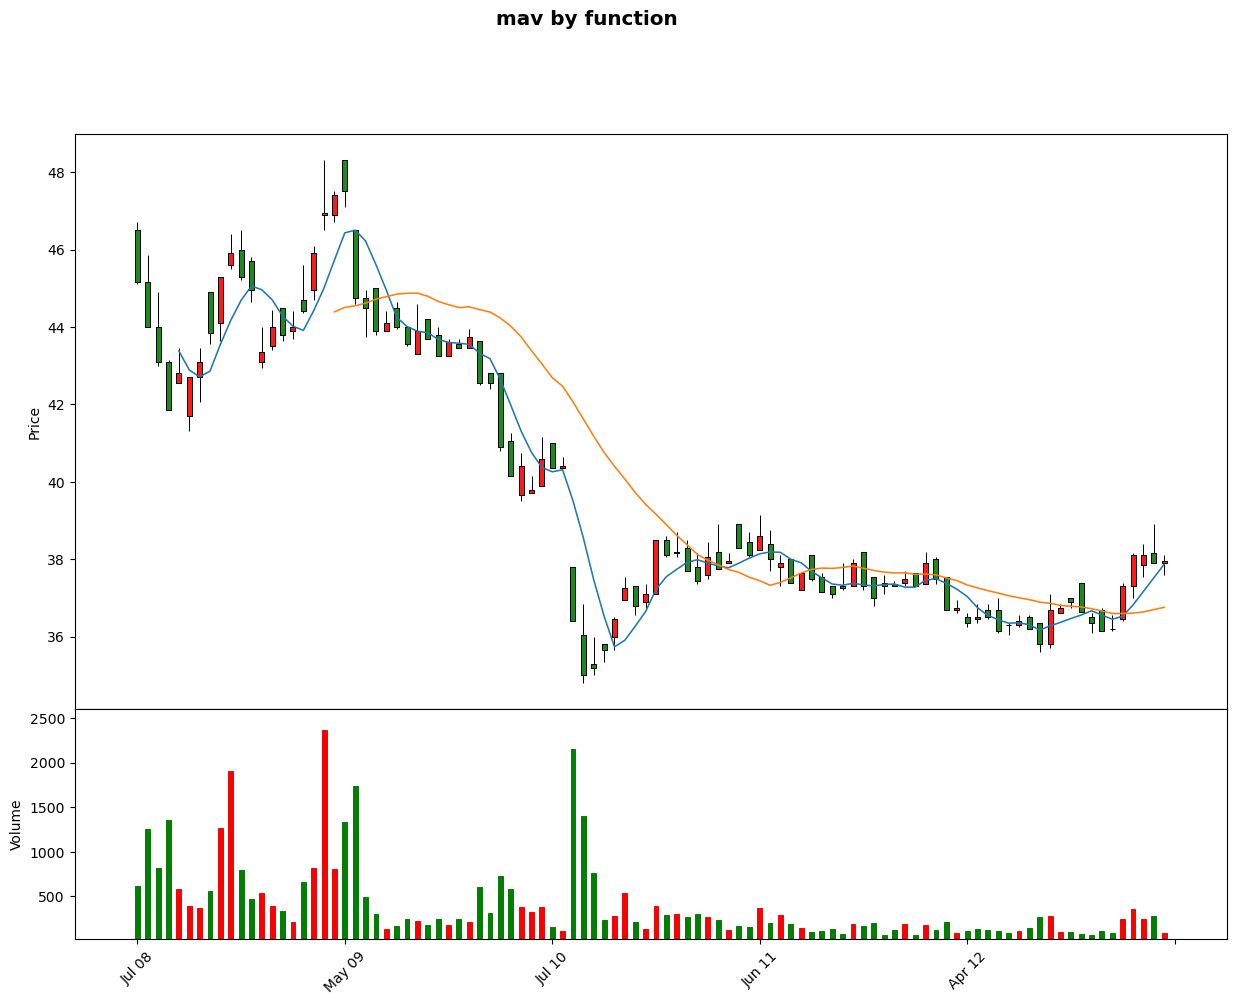

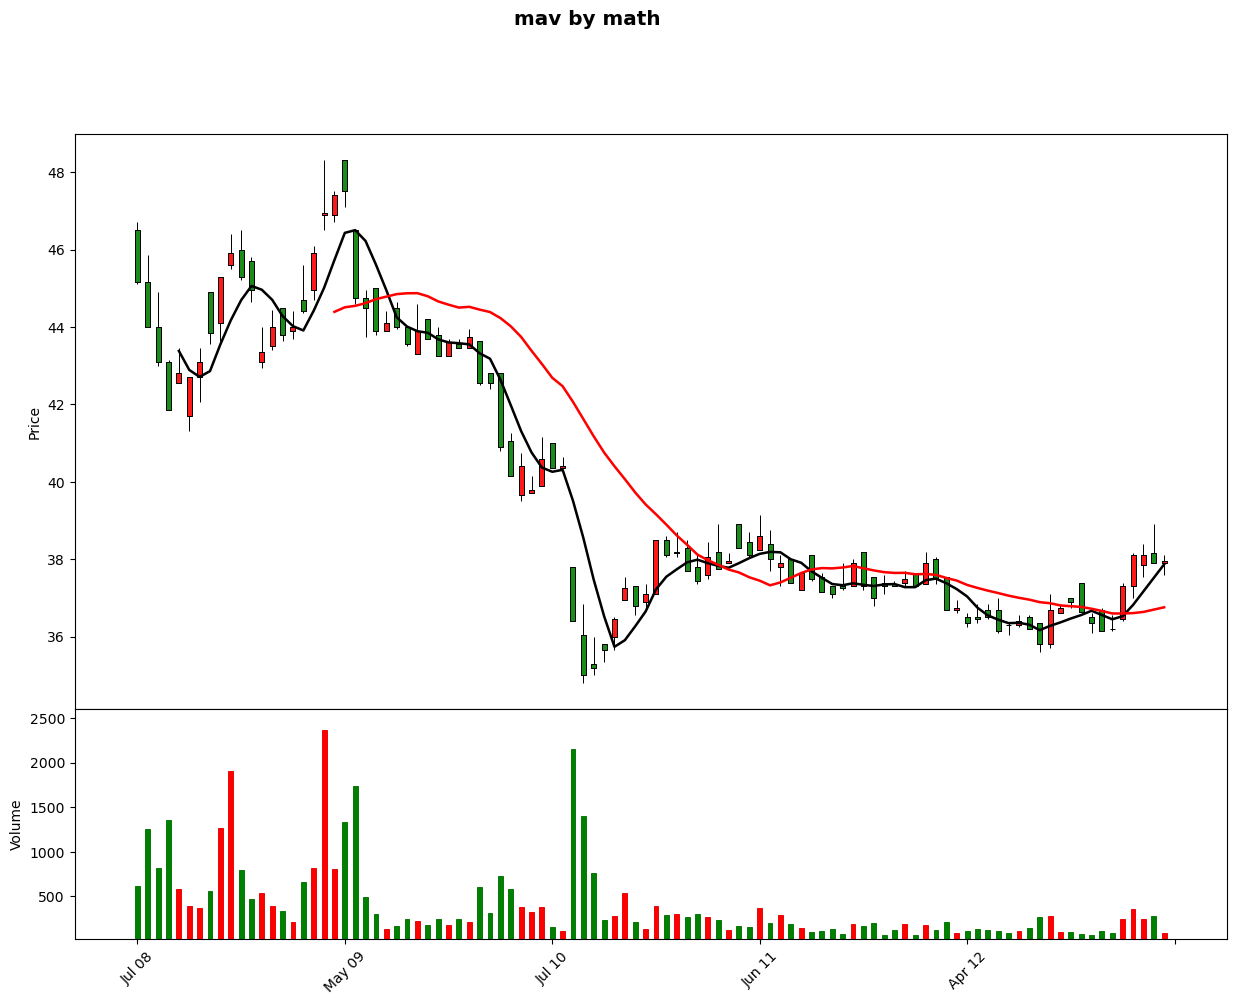

In [58]:
#使用數學方式計算 n日線 - 函式版本
import numpy as np
import pandas as pd
import mplfinance as mpf

#讀資料 (亞信3169) 20150105-20191231
stocks = pd.read_csv('stocks_3169.csv')

#整理以及排列資料 
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")

#取最新100筆資料
stocks = stocks.tail(100)

#客製化
#紅漲綠跌 (更改顏色)
colorSet = mpf.make_marketcolors(up = 'r', down = 'g', volume = 'inherit')

#style也要一起做更改
styleSet = mpf.make_mpf_style(marketcolors = colorSet)

#kwargs
kwargs = dict(type = 'candle', mav = (5, 20), volume = True, figscale = 2,
    style = styleSet, scale_width_adjustment = dict(volume = 0.5))

#繪圖 (上方的圖)
mpf.plot(stocks, **kwargs, title = 'mav by function')

#############################################################################

#stocks_close是近 100天收盤價的 list
stocks_close = [line for line in stocks['Close']]

#開始寫函式
def making_averages(days):
    days_mav = [np.nan] * (days - 1)
    for i in range((days - 1), len(stocks_close)):
        days_mav.append( sum( stocks_close[i-(days - 1) : i+1]) / (days) )
    return days_mav

#############################################################################

#使用 addplot
addplots = [mpf.make_addplot(making_averages(5), color = 'black'),
            mpf.make_addplot(making_averages(20), color = 'red')]

#kwargs2
kwargs2 = dict(type = 'candle', volume = True, figscale = 2,
    style = styleSet, scale_width_adjustment = dict(volume = 0.5))

#將自製 5日線、20日線匯出 (下方的圖)
mpf.plot(stocks, **kwargs2, addplot = addplots, title = 'mav by math')

-------------------------------------------------------------------------------------------------------------------------------

## 1-2-2 移動平均線 買賣點應用

### 移動平均的的功能： 

* 趨勢的特性 
* 穩定的特性 
* 時間落後的特性 
* 助漲的特性
* 助跌的特性 



<img src = "images/MA1.png" width = 600 height =300 align = "left">

### 葛蘭碧(Granville)八大法則   
  
<img src = "images/Granville_8.png" width = 600 height =300 align = "left">


### 20日MA線之意義及判別  

#### 底部—漲勢已現
1. 股價由下而上突破20日MA線，可酌量買進，若以紅K線突破更應買進。
2. 股價站上20日MA線，20日MA線由水平往上走，持股可增加。
3. 股價站上20日MA線，20日MA線往上走45º角，加碼買進。
4. 當股價加速上漲時，尤其是走45º角，股價有一大波段行情可循，投資人可以在股價正乖離大時出脫持股，等拉回至20日MA線，而20日MA線仍然上揚時，再進場介入。

#### 高檔—跌勢已現

1. 股價由上往下跌破20日MA線，持股減碼，若以黑K線跌破，更應減碼。
2. 股價在20日MA線之下，20日MA線由水平向下彎，持股再減碼，可酌量作空。
3. 股價在20日MA線之下，20日MA線向下彎且呈45º角走勢，出清持股可擇機放空。
4. 當股價加速下跌時，尤其是走45º角，股價有一大波段跌幅，投資人可以在股價負乖離大時，進場搶反彈，等反彈到20日MA線，而20日MA線仍然向下彎時，再出脫。


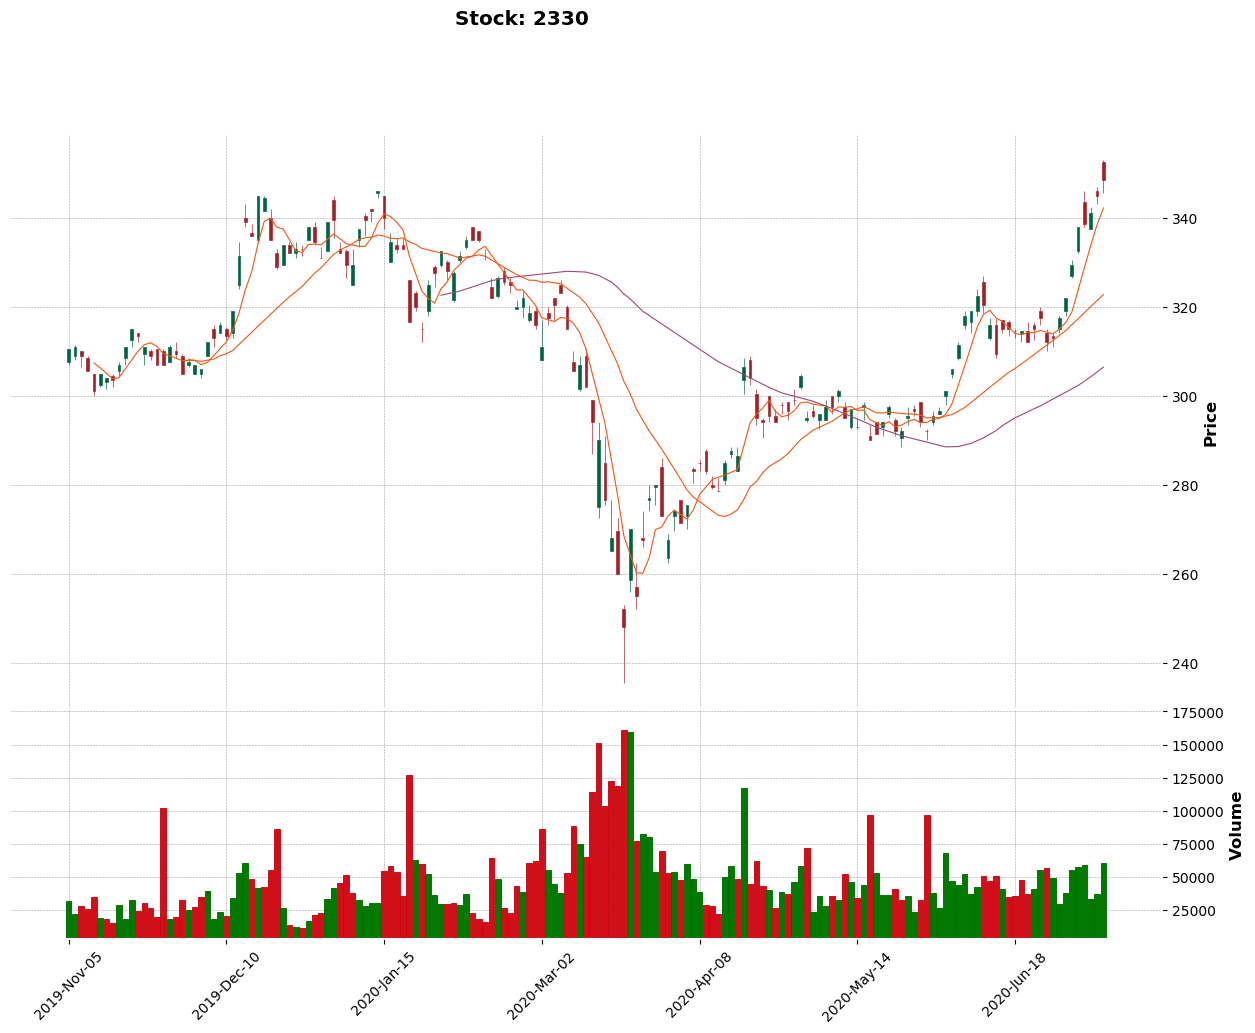

In [64]:
# 改變顏色(style)、圖案大小(figscale)、與長寬比例(figratio)
    # ：上漲使用紅色，下跌使用綠色
# style = 'charles'
# style = 'mike'    使用實心與空心來表示
# 可以使用 mpf.available_styles() 來看有哪些 style可以使用

from datetime import datetime
import pandas as pd

SData = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')

# SData2 = SData.tail(200)  # 只取最後200筆的資料

SData.index = pd.DatetimeIndex(SData.index)
SData = SData.loc['2019/11/05':'2020/7/10',:]


import mplfinance as mpf


mpf.plot(SData, type = 'candle', mav = [5, 20, 60], volume = True, title='Stock: 2330', style ='charles', figscale = 2)     # 圖案大小


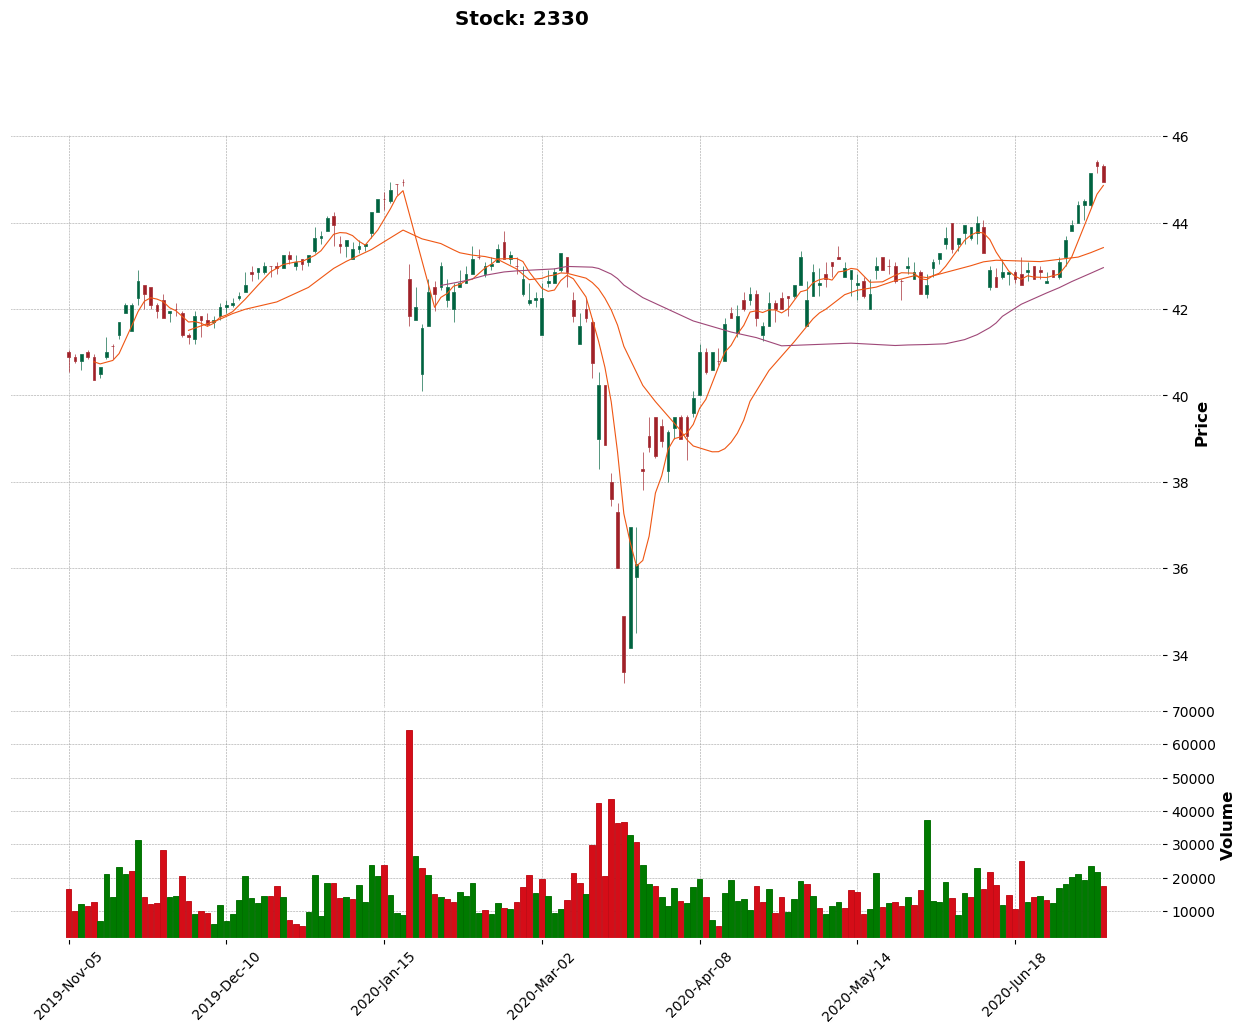

In [68]:
# 改變顏色(style)、圖案大小(figscale)、與長寬比例(figratio)
    # ：上漲使用紅色，下跌使用綠色
# style = 'charles'
# style = 'mike'    使用實心與空心來表示
# 可以使用 mpf.available_styles() 來看有哪些 style可以使用

from datetime import datetime
import pandas as pd

SData = pd.read_csv('data/stocks_1101.csv', index_col = 'Date')

# SData2 = SData.tail(200)  # 只取最後200筆的資料

SData.index = pd.DatetimeIndex(SData.index)
SData = SData.loc['2019/11/05':'2020/7/10',:]


import mplfinance as mpf


mpf.plot(SData, type = 'candle', mav = [5, 20, 60], volume = True, title='Stock: 1101', style ='charles', figscale = 2)     # 圖案大小


# 1-3 繪製圖形 - 自定義圖形

<Mpf_Figure size 2400x1000 with 0 Axes>

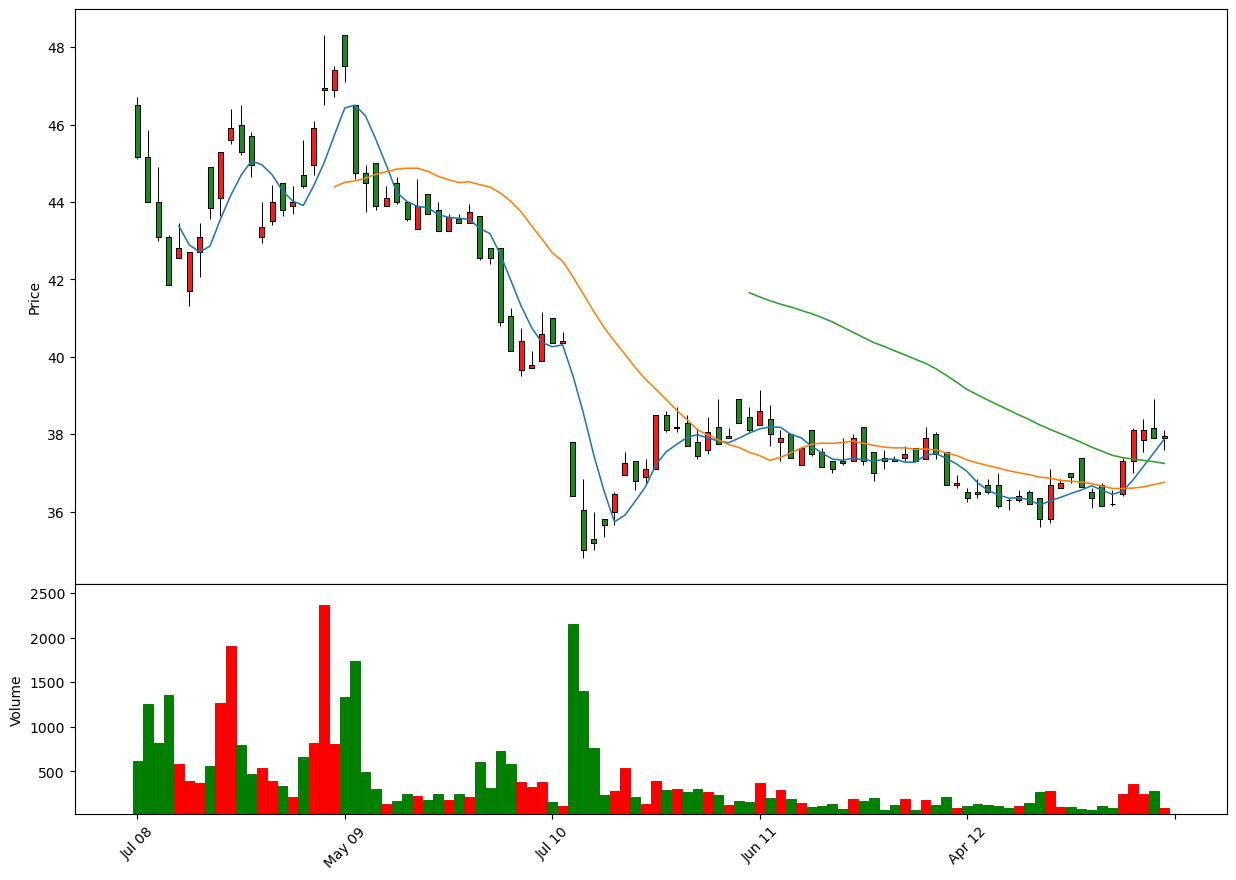

In [8]:
#寫法1
import pandas as pd
import mplfinance as mpf

#讀資料 (亞信3169)
stocks = pd.read_csv('stocks_3169.csv')

#整理以及排列資料 
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")

#取最新100筆資料
stocks = stocks.tail(100)

#figure大小
mpf.figure(figsize = (24, 10))

#自定義
#紅漲綠跌 (更改顏色)
colorSet = mpf.make_marketcolors(up = 'r', down = 'g', volume = 'inherit')

#style
styleSet = mpf.make_mpf_style(marketcolors = colorSet)

#繪圖
mpf.plot(stocks, style = styleSet, type = 'candle', volume = True, mav = (5, 20, 60), figscale = 2)

<Mpf_Figure size 2400x1000 with 0 Axes>

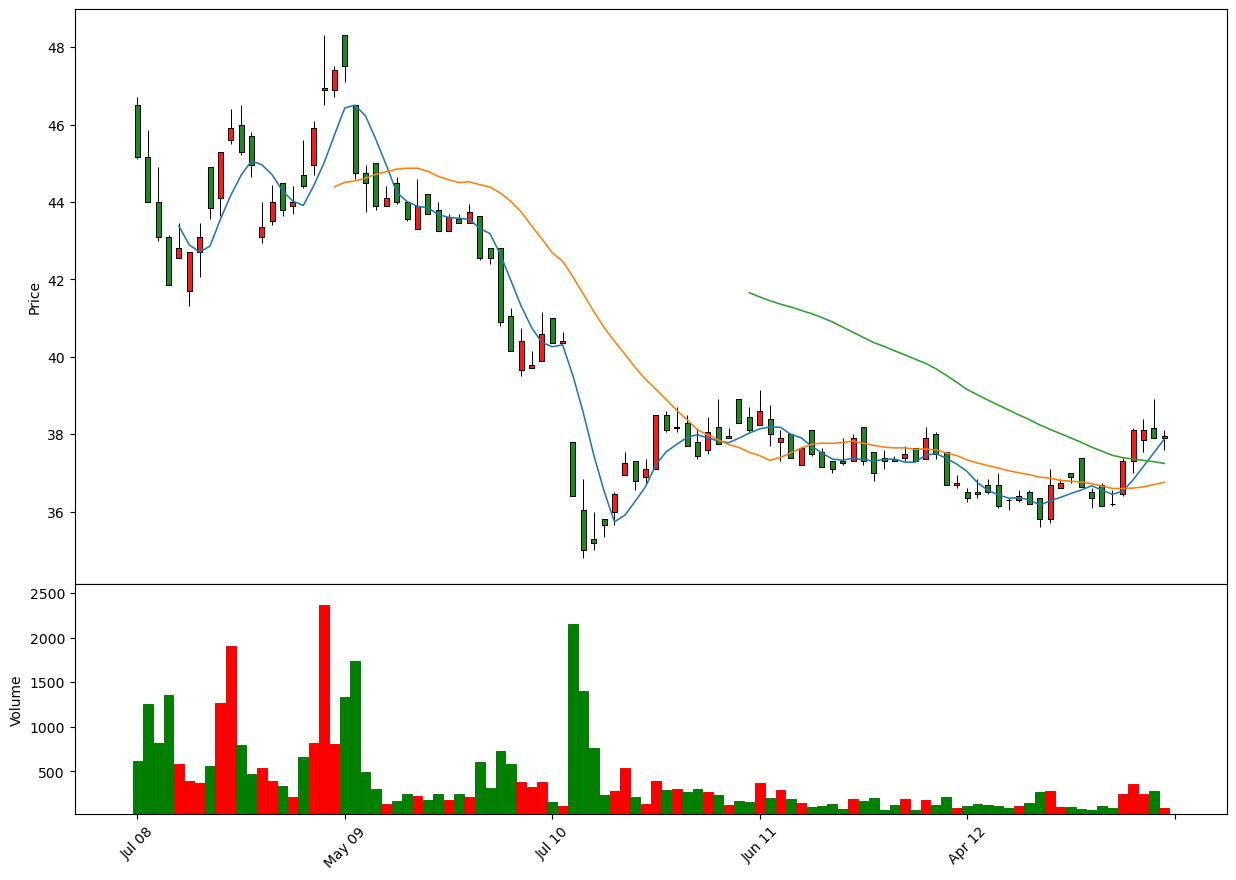

In [7]:
##寫法2
import pandas as pd
import mplfinance as mpf

#讀資料 (亞信3169)
stocks = pd.read_csv('stocks_3169.csv')

#整理以及排列資料 
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")

#取最新100筆資料
stocks = stocks.tail(100)

#figure大小
mpf.figure(figsize = (24, 10))

#自定義
#紅漲綠跌 (更改顏色)
colorSet = mpf.make_marketcolors(up = 'r', down = 'g', volume = 'inherit')

#style
styleSet = mpf.make_mpf_style(marketcolors = colorSet)

#kwargs
kwargs = dict(type = 'candle', mav = (5, 20, 60), volume = True, style = styleSet, figscale = 2)

#繪圖
mpf.plot(stocks, **kwargs)

-------------------------------------------------------------------------------------------------------------------------------

# 1-4 繪製圖形 - MACD指標 (Moving Average Convergence/Divergence)

### 1-4-1 MACD 計算與繪圖

### MACD指標定義：利用兩條不同的(快/慢)"指數移動平均線(EMA)"交錯來判斷股價走勢
### MACD指標公式：
#### 1. 首日EMA12 = 12天Close總和 / 12
#### 2. 首日EMA26 = 26天Close總和 / 26
#### 3. 非首日EMA12 = 前一天EMA12 * (11 / 13) + 今日Close * (2 / 13)
#### 4. 非首日EMA26 = 前一天EMA26 * (25 / 27) + 今日Close * (2 / 27)
#### 5. 差離值DIF = EMA12 - EMA26
#### 6. 首日MACD = 9天DIF總和 / 9
#### 7. 非首日MACD = 前一天MACD * (8 / 10) + 今日DIF * (2 / 10)
#### 8. 柱狀圖OSC = DIF - MACD

## References:
### How to install talib in python: 
#### https://blog.quantinsti.com/install-ta-lib-python/#windows

### How to calculate MACD:
#### https://www.investopedia.com/ask/answers/122414/what-moving-average-convergence-divergence-macd-formula-and-how-it-calculated.asp

### Colors in python:
#### https://matplotlib.org/3.3.3/gallery/color/named_colors.html

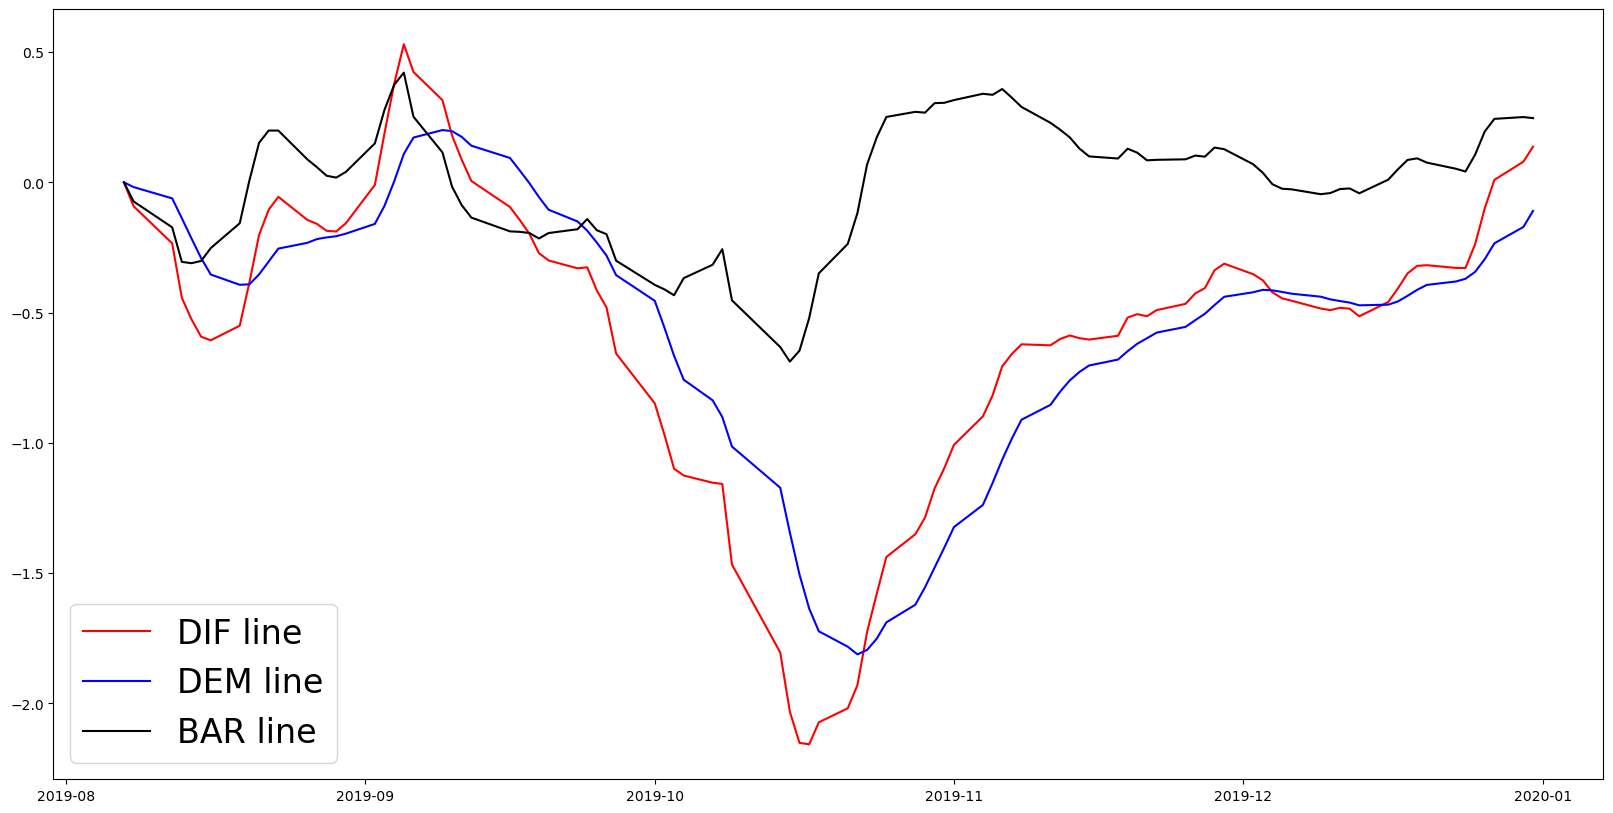

In [19]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

stocks = pd.read_csv('stocks_3169.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks.tail(100)

#製作MACD線圖
ema12 = stocks['Close'].ewm(span=12, adjust=False).mean() #12日移動平均線
ema26 = stocks['Close'].ewm(span=26, adjust=False).mean() #26日移動平均線
DIF  = ema12 - ema26                                      #快線
DEM = DIF.ewm(span = 9, adjust=False).mean()              #慢線
BAR = DIF - DEM                                           #柱狀圖

plt.figure(figsize = (20, 10))                            #圖片大小
plt.plot(DIF, label = 'DIF line', color = 'red')          #畫快線
plt.plot(DEM, label = 'DEM line', color = 'blue')         #畫慢線 
plt.plot(BAR, label = 'BAR line', color = 'black')        #柱狀圖
plt.legend(fontsize = 24)                                 #圖例字體大小
plt.show()

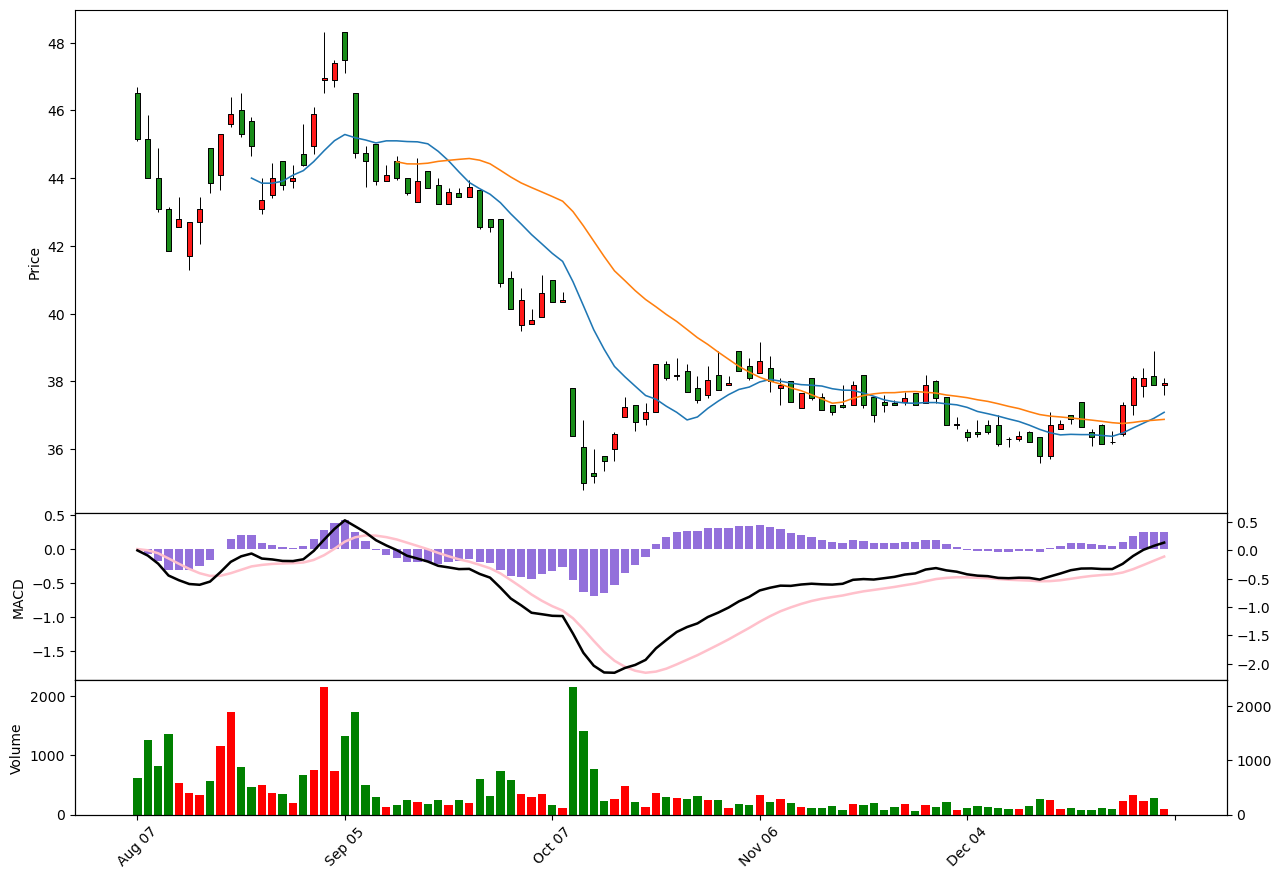

In [15]:
#自定義
import pandas as pd
import mplfinance as mpf

stocks = pd.read_csv('stocks_3169.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks.tail(100)

colorSet = mpf.make_marketcolors(up = 'r', down = 'g')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', mav = (12, 26), style = styleSet, figscale = 2)

#製作MACD圖
ema12 = stocks['Close'].ewm(span=12, adjust=False).mean() #12日移動平均線
ema26 = stocks['Close'].ewm(span=26, adjust=False).mean() #26日移動平均線
DIF  = ema12 - ema26                                      #快線
DEM = DIF.ewm(span=9, adjust=False).mean()                #慢線
BAR = DIF - DEM                                           #柱狀圖

#成交量分顏色
stocks_volume_red = []
stocks_volume_green = []

for i in range(0, len(stocks['Volume'])):
    if(stocks['Open'][i] < stocks['Close'][i]):
        stocks_volume_red.append(int(stocks['Volume'][i]))
    else:
        stocks_volume_red.append(0)
    if(stocks['Open'][i] >= stocks['Close'][i]):
        stocks_volume_green.append(int(stocks['Volume'][i]))
    else:
        stocks_volume_green.append(0)

#panel: 從上到下 panel = 0, 1, 2...
#secondary_y = True -> 印出y軸
draw = [
            mpf.make_addplot(BAR, type = 'bar', panel = 1, color = 'mediumpurple', ylabel = 'MACD'),
            mpf.make_addplot(DIF, panel = 1, color = 'black'),
            mpf.make_addplot(DEM, panel = 1, color = 'pink'),
            mpf.make_addplot(stocks_volume_green, panel = 2, color = 'green', type = 'bar', ylabel = 'Volume'),
            mpf.make_addplot(stocks_volume_red, panel = 2, color = 'red', type = 'bar')
       ]

#panel_ratio -> 子圖大小比例
mpf.plot(stocks, **kwargs, addplot = draw, panel_ratios = (3, 1, 0.8))

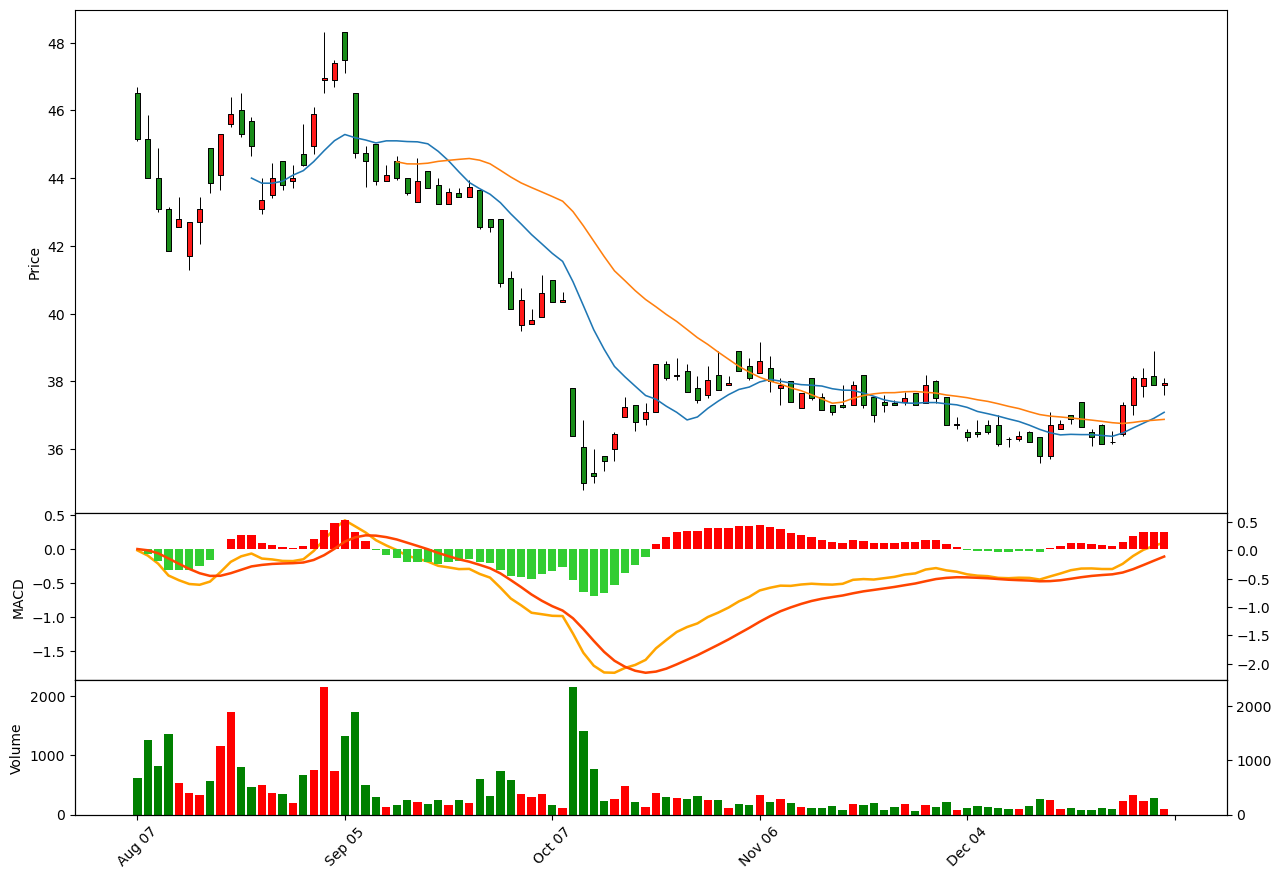

In [53]:
#in general
import pandas as pd
import mplfinance as mpf

stocks = pd.read_csv('stocks_3169.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks.tail(100)

colorSet = mpf.make_marketcolors(up = 'r', down = 'g', volume = 'inherit')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', mav = (12, 26), style = styleSet, figscale = 2)

#製作MACD圖
ema12 = stocks['Close'].ewm(span=12, adjust=False).mean() #12日移動平均線
ema26 = stocks['Close'].ewm(span=26, adjust=False).mean() #26日移動平均線
DIF  = ema12 - ema26                                      #短期
DEM = DIF.ewm(span=9, adjust=False).mean()                #長期

#為了讓柱狀圖有不一樣顏色，分開成兩個不同的list，一個存正數，一個存負數
BAR = DIF - DEM  
BAR[BAR < 0] = None  
BAR_positive = BAR
BAR = DIF - DEM  
BAR[BAR >= 0] = None  
BAR_negative = BAR

#成交量分顏色
stocks_volume_red = []
stocks_volume_green = []

for i in range(0, len(stocks['Volume'])):
    if(stocks['Open'][i] < stocks['Close'][i]):
        stocks_volume_red.append(int(stocks['Volume'][i]))
    else:
        stocks_volume_red.append(0)
    if(stocks['Open'][i] >= stocks['Close'][i]):
        stocks_volume_green.append(int(stocks['Volume'][i]))
    else:
        stocks_volume_green.append(0)

#panel: 從上到下 panel = 0, 1, 2...
#secondary_y = True -> 印出y軸
draw = [
            mpf.make_addplot(BAR_negative, type = 'bar', panel = 1, color = 'limegreen', secondary_y = True, ylabel = 'MACD'),
            mpf.make_addplot(BAR_positive, type = 'bar', panel = 1, color = 'red', secondary_y = True, y_on_right = True),
            mpf.make_addplot(DIF, panel = 1, color = 'orange'),
            mpf.make_addplot(DEM, panel = 1, color = 'orangered'),
            mpf.make_addplot(stocks_volume_green, panel = 2, color = 'green', type = 'bar', ylabel = 'Volume'),
            mpf.make_addplot(stocks_volume_red, panel = 2, color = 'red', type = 'bar')
           ]

#panel_ratio -> 子圖大小比例
mpf.plot(stocks, **kwargs, addplot = draw, panel_ratios = (3, 1, 0.8))

-------------------------------------------------------------------------------------------------------------------------------

# 1-5 繪製圖形 - RSI指標 (Relative Strength Index)

### 1-5-1 RSI 繪圖與計算

## RSI指標定義：判斷買賣雙方力道強弱的指標
## RSI指標公式：100 * 前N日漲幅平均值 / (前N日漲幅平均值 + 前N日跌幅平均值)

## Introduce and calculate RSI: 
### https://handsoffinvesting.com/calculate-and-analyze-rsi-using-python/

[nan, -1.15, -0.9, -1.25, 0.95, -0.1, 0.4, 0.75, 1.45, 0.6, -0.6, -0.35, -1.6, 0.65, -0.2, 0.2, 0.4, 1.5, 1.05, 0.45, 0.1, -2.75, -0.25, -0.6, 0.2, -0.1, -0.45, 0.35, -0.2, -0.45, 0.35, -0.15, 0.3, -1.2, 0.0, -1.65, -0.75, 0.25, -0.6, 0.8, -0.25, 0.05, -4.0, -1.4, 0.2, 0.45, 0.8, 0.8, -0.45, 0.3, 1.4, -0.4, 0.1, -0.5, -0.25, 0.6, -0.3, 0.2, 0.35, -0.2, 0.5, -0.6, -0.1, -0.5, 0.25, -0.15, -0.35, -0.05, 0.15, 0.65, -0.6, -0.3, 0.3, 0.0, 0.2, -0.2, 0.6, -0.4, -0.8, 0.05, -0.4, 0.1, 0.05, -0.35, 0.15, 0.1, -0.2, -0.4, 0.9, 0.05, 0.15, -0.25, -0.3, -0.2, 0.05, 1.1, 0.8, 0.0, -0.2, 0.05]
[0, 0, 0, 0, 0.95, 0, 0.4, 0.75, 1.45, 0.6, 0, 0, 0, 0.65, 0, 0.2, 0.4, 1.5, 1.05, 0.45, 0.1, 0, 0, 0, 0.2, 0, 0, 0.35, 0, 0, 0.35, 0, 0.3, 0, 0, 0, 0, 0.25, 0, 0.8, 0, 0.05, 0, 0, 0.2, 0.45, 0.8, 0.8, 0, 0.3, 1.4, 0, 0.1, 0, 0, 0.6, 0, 0.2, 0.35, 0, 0.5, 0, 0, 0, 0.25, 0, 0, 0, 0.15, 0.65, 0, 0, 0.3, 0, 0.2, 0, 0.6, 0, 0, 0.05, 0, 0.1, 0.05, 0, 0.15, 0.1, 0, 0, 0.9, 0.05, 0.15, 0, 0, 0, 0.05, 1.1, 0.8, 0, 0

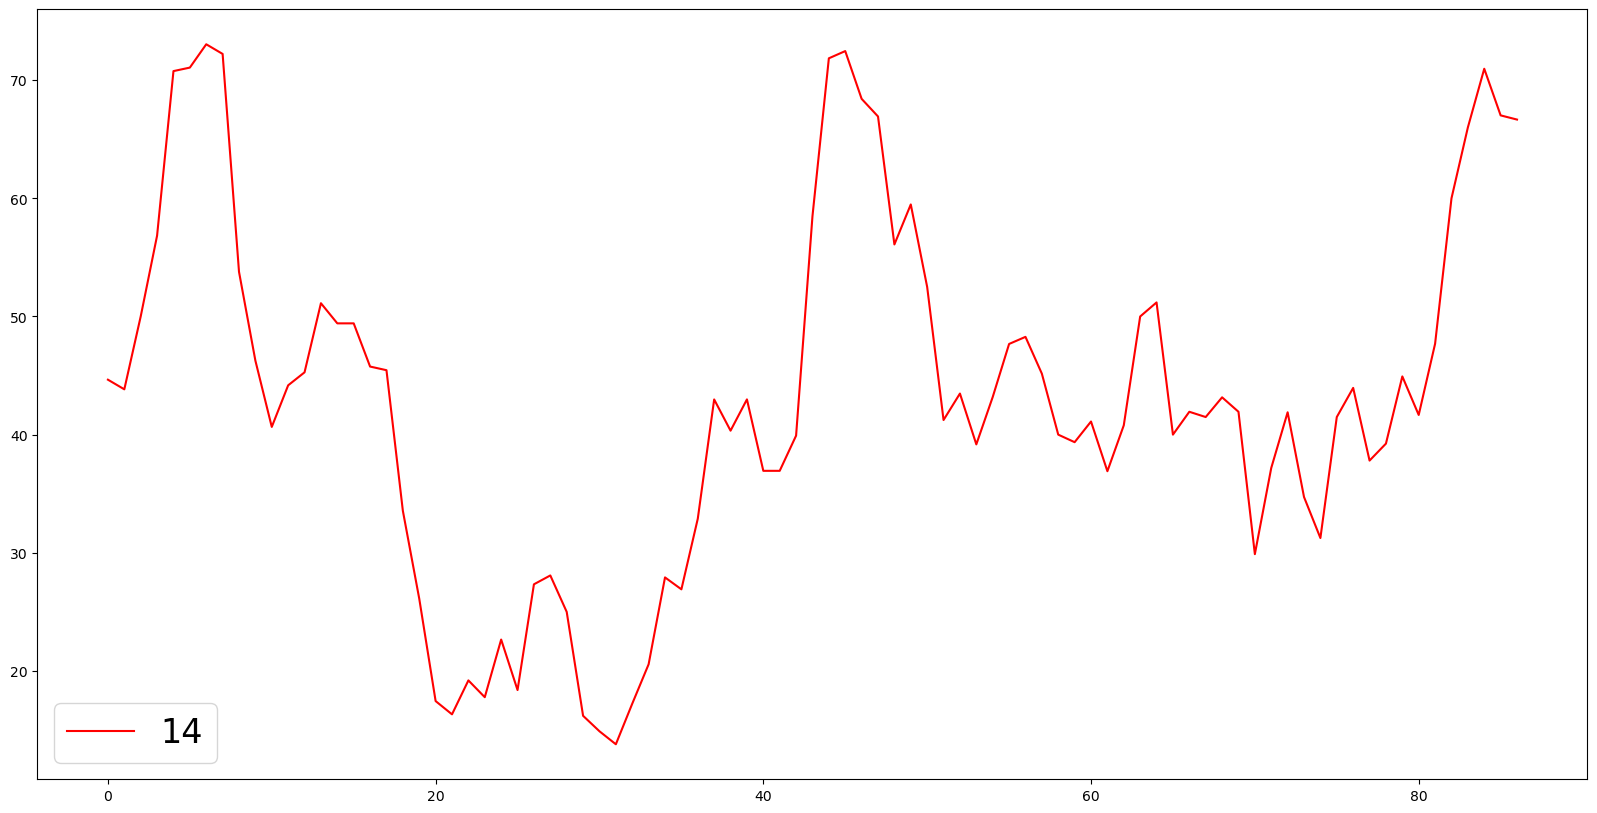

In [25]:
#RSI 14
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
stocks = pd.read_csv('stocks_3169.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks.tail(100)

#計算RSI
stocks_close = [float(line) for line in stocks['Close']]
delta = [np.nan] #存差值
up = []          #存 >0 的差值
down = []        #存 <0 的差值
rsi = []         #存RSI的值

#計算差值
for i in range(1, 100):
    delta.append(round(stocks_close[i] - stocks_close[i - 1], 2))

#分別放進差值 (<0, >0)
for value in delta:
    up.append(value if value > 0 else 0)
    down.append(value if value < 0 else 0)
    
#計算前14日漲幅平均值、前14日跌幅平均值
for i in range(13, 100):
    gain = sum(up[i - 13 : i + 1]) / 14
    lost = abs(sum(down[i - 13 : i + 1])) / 14
    rsi.append(100 * gain / (gain + lost))

#測試，印出差值
print(delta)
#測試、只印出 >0 的差值
print(up)
#測試、只印出 <0 的差值
print(down)

plt.figure(figsize = (20, 10))
plt.plot(rsi, label = '14', color = 'red')
plt.legend(fontsize = 24)
plt.show()

[nan, -1.15, -0.9, -1.25, 0.95, -0.1, 0.4, 0.75, 1.45, 0.6, -0.6, -0.35, -1.6, 0.65, -0.2, 0.2, 0.4, 1.5, 1.05, 0.45, 0.1, -2.75, -0.25, -0.6, 0.2, -0.1, -0.45, 0.35, -0.2, -0.45, 0.35, -0.15, 0.3, -1.2, 0.0, -1.65, -0.75, 0.25, -0.6, 0.8, -0.25, 0.05, -4.0, -1.4, 0.2, 0.45, 0.8, 0.8, -0.45, 0.3, 1.4, -0.4, 0.1, -0.5, -0.25, 0.6, -0.3, 0.2, 0.35, -0.2, 0.5, -0.6, -0.1, -0.5, 0.25, -0.15, -0.35, -0.05, 0.15, 0.65, -0.6, -0.3, 0.3, 0.0, 0.2, -0.2, 0.6, -0.4, -0.8, 0.05, -0.4, 0.1, 0.05, -0.35, 0.15, 0.1, -0.2, -0.4, 0.9, 0.05, 0.15, -0.25, -0.3, -0.2, 0.05, 1.1, 0.8, 0.0, -0.2, 0.05]
[0, 0, 0, 0, 0.95, 0, 0.4, 0.75, 1.45, 0.6, 0, 0, 0, 0.65, 0, 0.2, 0.4, 1.5, 1.05, 0.45, 0.1, 0, 0, 0, 0.2, 0, 0, 0.35, 0, 0, 0.35, 0, 0.3, 0, 0, 0, 0, 0.25, 0, 0.8, 0, 0.05, 0, 0, 0.2, 0.45, 0.8, 0.8, 0, 0.3, 1.4, 0, 0.1, 0, 0, 0.6, 0, 0.2, 0.35, 0, 0.5, 0, 0, 0, 0.25, 0, 0, 0, 0.15, 0.65, 0, 0, 0.3, 0, 0.2, 0, 0.6, 0, 0, 0.05, 0, 0.1, 0.05, 0, 0.15, 0.1, 0, 0, 0.9, 0.05, 0.15, 0, 0, 0, 0.05, 1.1, 0.8, 0, 0

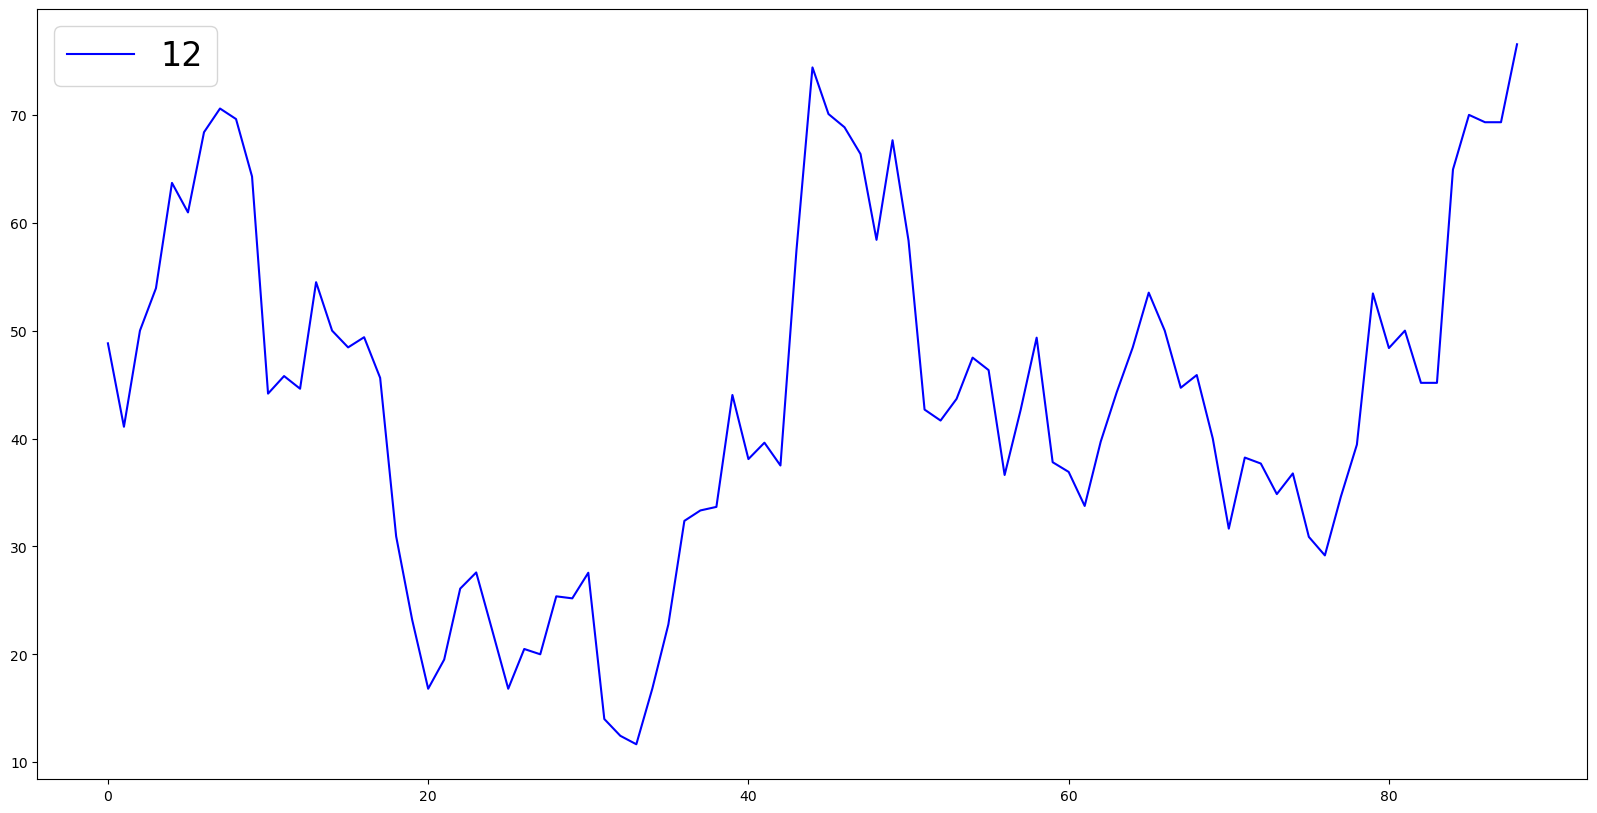

In [27]:
#RSI 12
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
stocks = pd.read_csv('stocks_3169.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks.tail(100)

#計算RSI
stocks_close = [float(line) for line in stocks['Close']]
delta = [np.nan] #存差值
up = []          #存 >0 的差值
down = []        #存 <0 的差值
rsi = []         #存RSI的值

#計算差值
for i in range(1, 100):
    delta.append(round(stocks_close[i] - stocks_close[i - 1], 2))

#分別放進差值 (<0, >0)
for value in delta:
    up.append(value if value > 0 else 0)
    down.append(value if value < 0 else 0)
    
#計算前12日漲幅平均值、前12日跌幅平均值
for i in range(11, 100):
    gain = sum(up[i - 11 : i + 1]) / 14
    lost = abs(sum(down[i - 11 : i + 1])) / 14
    rsi.append(100 * gain / (gain + lost))

#測試，印出差值
print(delta)
#測試、只印出 >0 的差值
print(up)
#測試、只印出 <0 的差值
print(down)

plt.figure(figsize = (20, 10))
plt.plot(rsi, label = '12', color = 'blue')
plt.legend(fontsize = 24)
plt.show()

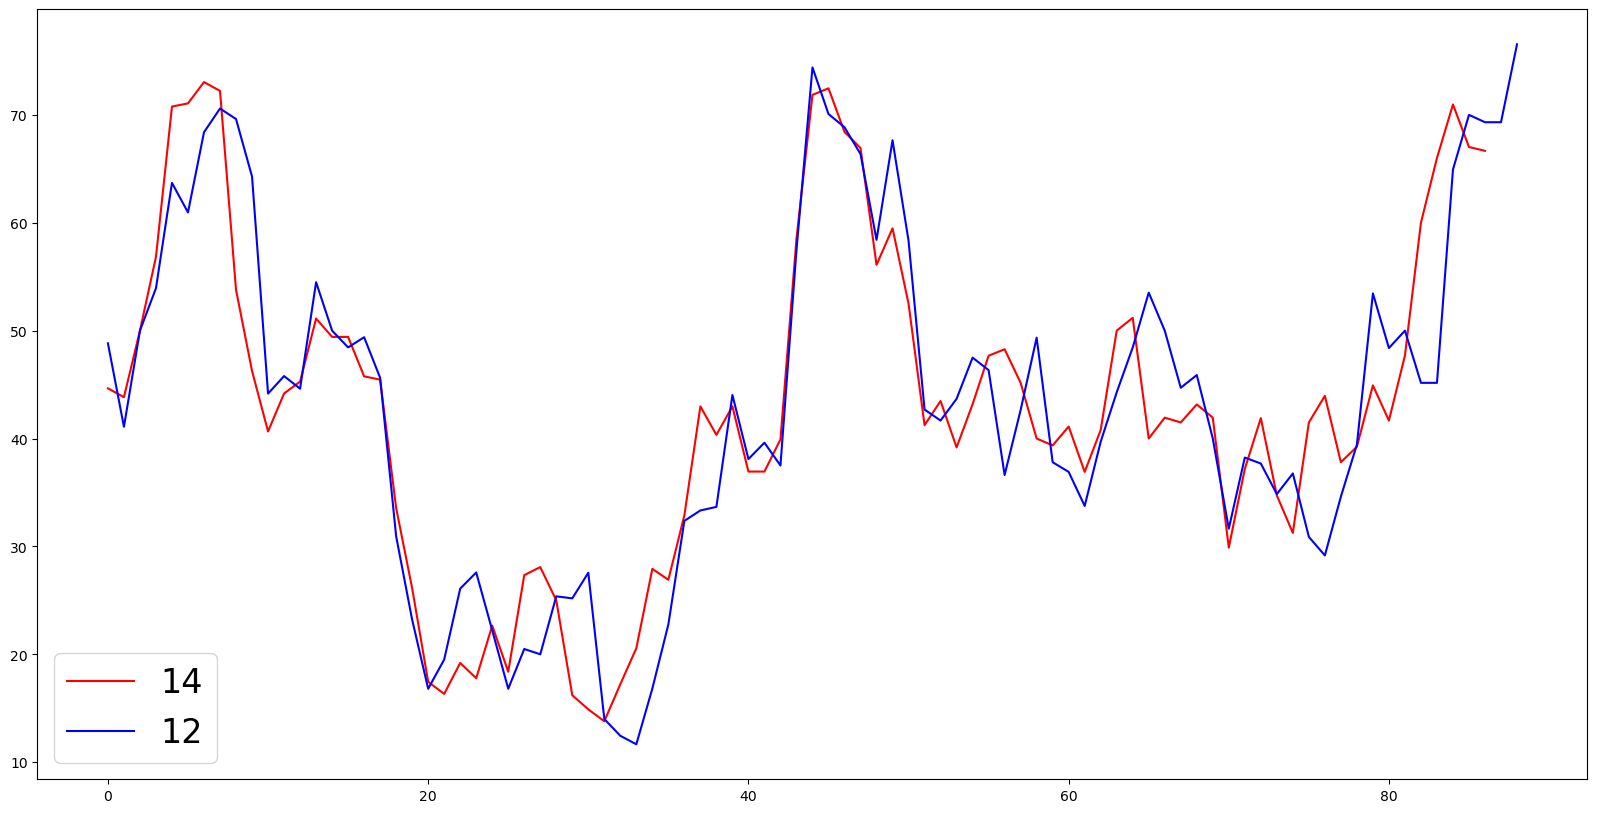

In [28]:
#做成函式
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
stocks = pd.read_csv('stocks_3169.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks.tail(100)

#############################################################################

def rsiLine(period):
    stocks_close = [float(line) for line in stocks['Close']]
    delta = [np.nan]
    up = []
    down = []
    rsi = []

    for i in range(1, 100):
        delta.append(round(stocks_close[i] - stocks_close[i - 1], 2))
    for value in delta:
        up.append(value if value > 0 else 0)
        down.append(value if value < 0 else 0)
    for i in range(period - 1, 100):
        gain = sum(up[i - (period - 1) : i + 1]) / period
        lost = abs(sum(down[i - (period - 1) : i + 1])) / period
        rsi.append(100 * gain / (gain + lost))
    return rsi

#############################################################################

plt.figure(figsize = (20, 10))
plt.plot(rsiLine(14), label = '14', color = 'red')
plt.plot(rsiLine(12), label = '12', color = 'blue')
plt.legend(fontsize = 24)
plt.show()

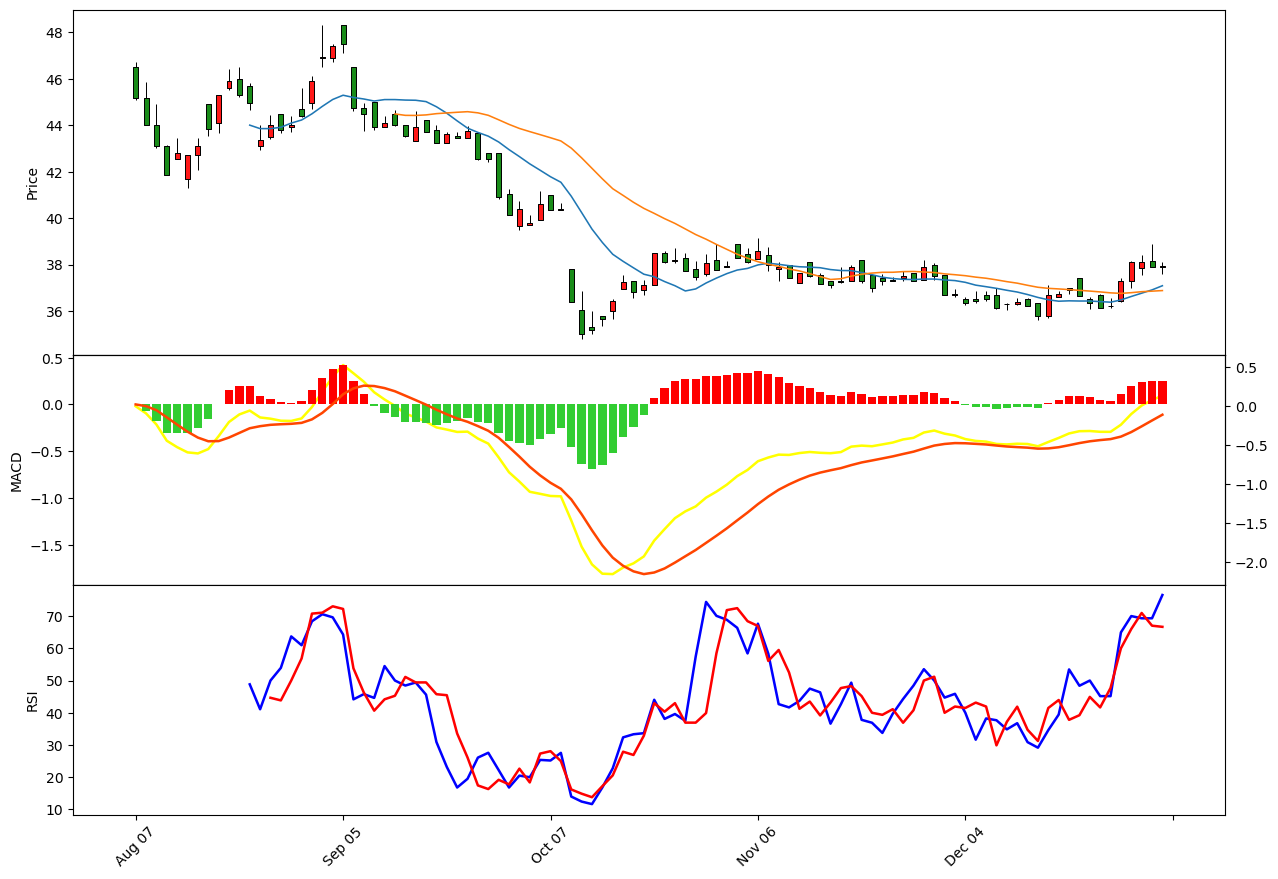

In [54]:
#in general
import pandas as pd
import mplfinance as mpf
import numpy as np

stocks = pd.read_csv('stocks_3169.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks.tail(100)

colorSet = mpf.make_marketcolors(up = 'r', down = 'g', inherit = False)

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', mav = (12, 26), style = styleSet, figscale = 2)

#製作MACD圖
ema12 = stocks['Close'].ewm(span=12, adjust=False).mean() #12日移動平均線
ema26 = stocks['Close'].ewm(span=26, adjust=False).mean() #26日移動平均線
DIF  = ema12 - ema26                                      #短期
DEM = DIF.ewm(span=9, adjust=False).mean()                #長期

#為了讓柱狀圖有不一樣顏色，分開成兩個不同的list，一個存正數，一個存負數
BAR = DIF - DEM  
BAR[BAR < 0] = None  
BAR_positive = BAR
BAR = DIF - DEM  
BAR[BAR >= 0] = None  
BAR_negative = BAR

#製作RSI線圖
def rsiLine(period):
    stocks_close = [float(line) for line in stocks['Close']]
    delta = [np.nan]
    up = []
    down = []
    rsi = [np.nan] * (period - 1)

    for i in range(1, 100):
        delta.append(round(stocks_close[i] - stocks_close[i - 1], 2))
    for value in delta:
        up.append(value if value > 0 else 0)
        down.append(value if value < 0 else 0)
    for i in range(period - 1, 100):
        gain = sum(up[i - (period - 1) : i + 1]) / period
        lost = abs(sum(down[i - (period - 1) : i + 1])) / period
        rsi.append(100 * gain / (gain + lost))
    return rsi

draw = [
            mpf.make_addplot(BAR_negative, type = 'bar', panel = 1, color = 'limegreen', secondary_y = True, ylabel = 'MACD'),
            mpf.make_addplot(BAR_positive, type = 'bar', panel = 1, color = 'red', secondary_y = True, y_on_right = True),
            mpf.make_addplot(DIF, panel = 1, color = 'yellow'),
            mpf.make_addplot(DEM, panel = 1, color = 'orangered'),
            mpf.make_addplot(rsiLine(12), panel = 2, color = 'blue', ylabel = 'RSI'), 
            mpf.make_addplot(rsiLine(14), panel = 2, color = 'red'), 
       ]

mpf.plot(stocks, **kwargs, addplot = draw, panel_ratios = (3, 2, 2))

### 1-5-1 RSI 應用

### RSI買賣點研判

* 50為多空平衡點，50以上是多頭市場，代表多頭力道大於空頭力道，宜買；50以下是空頭市場，代表空頭力道大於多頭力道，宜賣。


* 80以上為超買區，90以上是嚴重超買區，若出現M頭宜賣。20以下為超賣區，10以下是嚴重超賣區，若出現W底宜買。


* RSI若一底比一底高(以6日RSI為主)，代表多頭力道轉強，後市可能再漲一段，宜買，若RSI一底比一底低(以6日RSI為主)，代表空頭力道轉弱，後市可能再跌一段，宜賣。


* RSI可以使用切線(趨勢線)，畫出支撐及阻力線(以6日RSI為主)，以研判未來走勢的強弱，跌破支撐線宜賣，突破阻力線宜買，它比K線更能看出股價或指數的未來走勢型態。


* 若股價或指數創新高，RSI也同步創新高，後市仍強，可能再漲一段；若股價或指數創新高，RSI未同步創新高，後市轉弱，可能會反轉。


* 若股價或指數創新低，RSI也同步創新低，後市仍弱，可能再跌一段；若股價或指數創新低，RSI未同步創新低，後市轉強，可能會反轉。


### 6日RSI的操作方式可以採用下列幾種方法：

* 50以上是多頭市場，50以下是空頭市場，採用底部墊高，頂部也墊高的研判方法，並以站上50指標之上者，為介入的標的。反之，底部愈來愈低，頂部也下移的個股，若反彈無法站上50，都是賣出的時機。  

  
* 6日RSI突破50並站上80，拉回不破50是買點，若站在80以上能超過3天，則拉回在50附近都是介入點，6日RSI跌破50，有相當長一段時間在50之下游走，股價無法表現會拉回整理，若跌破50在3天之內無法站上50都是賣點，若跌破20則為弱勢，反彈應作賣。  


* 6日RSI在50之上，向上突破80，並站上80，3天以上拉回不破50都是買點，反之6日RSI在50以下，向下跌破20，3天之內無法站上50，都是賣點。


* 可以在6日RSI的低點及頂點畫出支撐及阻力線，RSI拉回不破支撐可以介入，跌破支撐則賣出，突破阻力線拉回不破可介入。


* 6日RSI在20以下，80以上的指標背離為假背離，20～50間的背離為真背離，亦即6日RSI在20以下的背離，反彈是賣點，股價會再跌，80以上的背離，拉回不破50，可以介入，股價會再漲，若指標跌破50，則為真背離，股價會下跌，若是在20～50之間股價會拉回整理，若股價創新高，指標未創新高，且跌破50，形成真背離，股價會拉回。


* 6日RSI在50以下停留時間較長則股價會拉回整理，在50以上停留時間較長，則股價會有表現。



### RSI 買賣點範例

-------------------------------------------------------------------------------------------------------------------------------

# 1-6 繪製圖形 - 布林通道 (Bollinger Bands)

## 布林通道定義：由均線跟標準差組成，分為上線、中線、下線，為了看得更清楚股價走勢，加入上線以及下線

## 布林通道公式：上線、下線：中線 +/- 2 倍標準差、中線：20日移動平均線

## What is Bollinger Bands:
### https://histock.tw/blog/histock1688/43

## Introduce TA-Lib:
### https://kknews.cc/zh-tw/invest/pyyvkjz.html

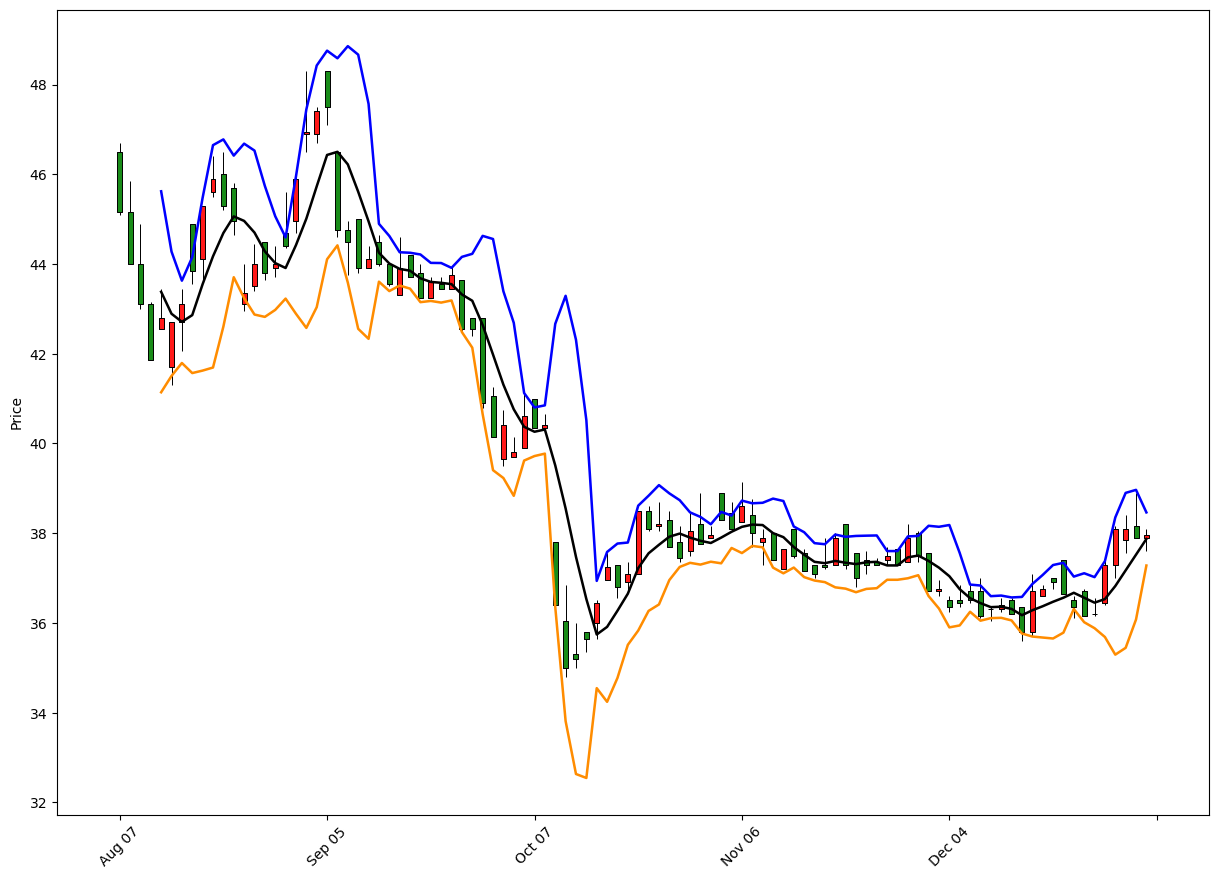

In [36]:
import pandas as pd
import mplfinance as mpf
from talib import abstract

stocks = pd.read_csv('stocks_3169.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks.tail(100)

colorSet = mpf.make_marketcolors(up = 'r', down = 'g', inherit = False)

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', style = styleSet, figscale = 2)

#Bollinger Bands
stock_BBands = stocks.copy() #複製資料
stock_BBands.columns = ['date', 'open', 'high', 'low', 'close', 'volume']    
aBBands = abstract.BBANDS(stock_BBands) #talib內建方法

upper_bound  = aBBands['upperband']
middle_bound = aBBands['middleband']
lower_bound  = aBBands['lowerband']

apds = [
        mpf.make_addplot(upper_bound, color = 'blue'),
        mpf.make_addplot(middle_bound, color = 'black'),
        mpf.make_addplot(lower_bound, color = 'darkorange'),
       ]

mpf.plot(stock_BBands, **kwargs, addplot = apds)

-------------------------------------------------------------------------------------------------------------------------------

# 1-7 繪製圖形 - KD指標

### 1-7-1 計算方式與繪圖

## KD指標定義：利用RSV進行加權計算、RSV表達"與最近N天相比今天股價是強還是弱？"

## KD指標公式：
### RSV = ( (第N日收盤價 - 最近N天最低價) / ( 最近N天最高價 -  最近N天最低價) )
### K = 2/3 * 前一日K值 + 1/3 * RSV
### D = 2/3 * 前一日D值 + 1/3 *K值

###  0 <= K,D <= 100

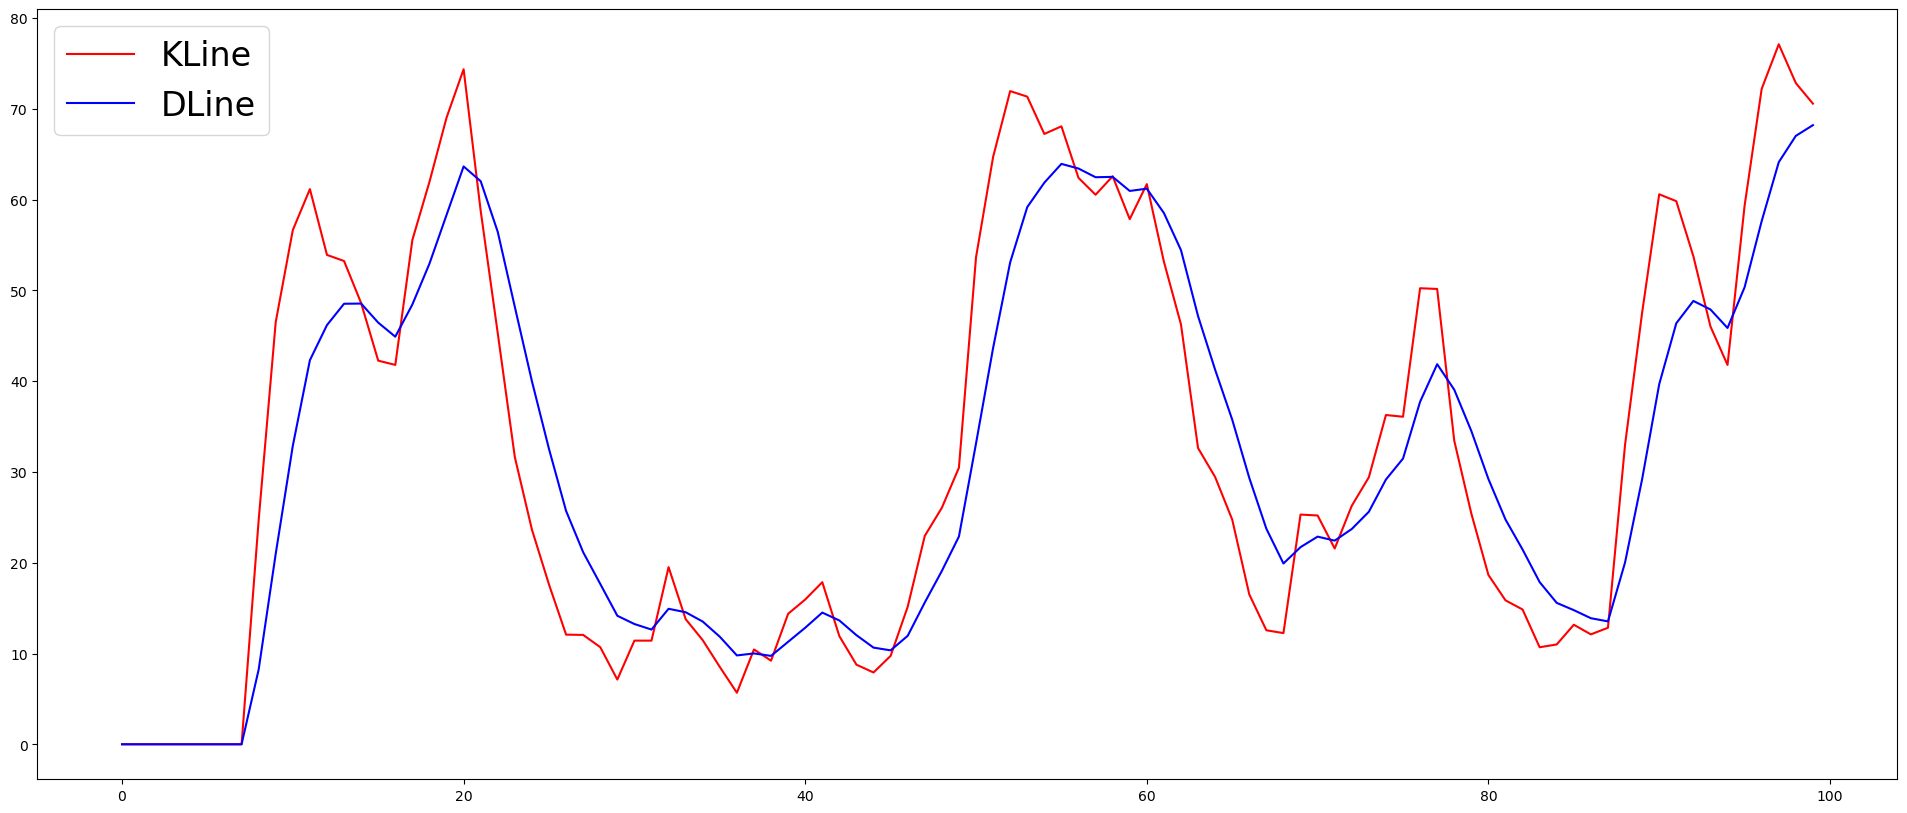

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

stocks = pd.read_csv('stocks_3169.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks.tail(100)

#KD K為快線、D為慢線
stocks_close = [float(line) for line in stocks['Close']] #收盤價
stocks_high = [float(line) for line in stocks['High']]   #最高價
stocks_low = [float(line) for line in stocks['Low']]     #最低價
rsv = []                                                 #RSV list
Kpoint = [0]                                             #K值 list
Dpoint = [0]                                             #D值 list

#最近9天的 KD指標
#計算 RSV
for i in range(8, len(stocks_close)):
    low = min(stocks_low[i-8 : i+1])
    high = max(stocks_high[i-8 : i+1])
    rsv.append(round(100 * ((stocks_close[i] - low) / (high - low)), 2))

#計算K值和D值
for i in range(0, len(rsv)):
    Kpoint.append(round((Kpoint[i] * (2 / 3) + rsv[i] * (1 / 3)), 2))
    Dpoint.append(round((Dpoint[i] * (2 / 3) + Kpoint[i + 1] * (1 / 3)), 2))

#補齊元素個數，前 8項較不重要，所以補 0
for i in range(0, 7):
    Kpoint.insert(i, 0)
    Dpoint.insert(i, 0)

plt.figure(figsize = (24, 10))
plt.plot(Kpoint, label = 'KLine', color = 'red')
plt.plot(Dpoint, label = 'DLine', color = 'blue')
plt.legend(fontsize = 24)
plt.show()

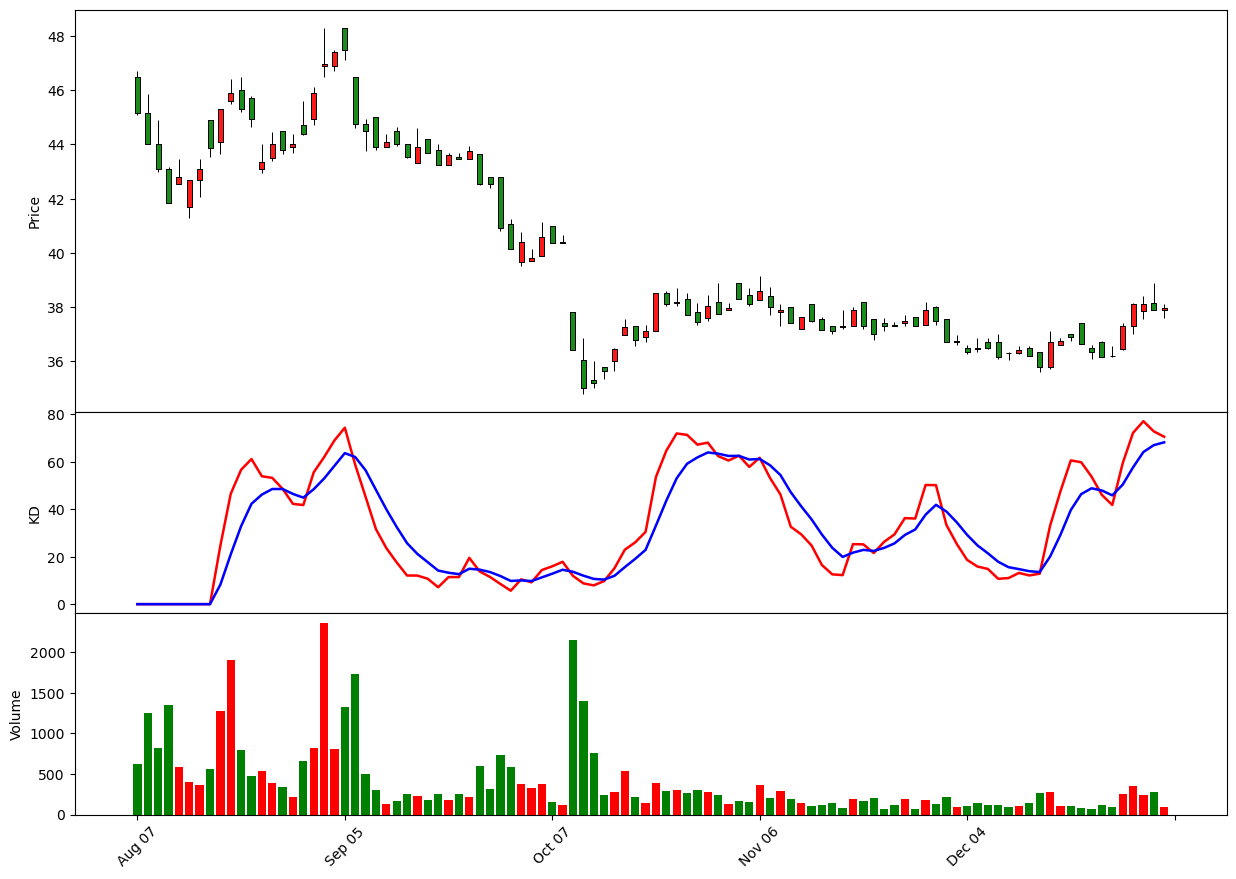

In [38]:
import pandas as pd
import mplfinance as mpf

stocks = pd.read_csv('stocks_3169.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks.tail(100)

colorSet = mpf.make_marketcolors(up = 'r', down = 'g', inherit = False)

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', style = styleSet, figscale = 2)

#KD K為快線、D為慢線
stocks_close = [float(line) for line in stocks['Close']] #收盤價
stocks_high = [float(line) for line in stocks['High']]   #最高價
stocks_low = [float(line) for line in stocks['Low']]     #最低價
rsv = []                                                 #RSV list
Kpoint = [0]                                             #K值 list
Dpoint = [0]                                             #D值 list

#最近9天的 KD指標
#計算 RSV
for i in range(8, len(stocks_close)):
    low = min(stocks_low[i-8 : i+1])
    high = max(stocks_high[i-8 : i+1])
    rsv.append(round(100 * ((stocks_close[i] - low) / (high - low)), 2))

#計算K值和D值
for i in range(0, len(rsv)):
    Kpoint.append(round((Kpoint[i] * (2 / 3) + rsv[i] * (1 / 3)), 2))
    Dpoint.append(round((Dpoint[i] * (2 / 3) + Kpoint[i + 1] * (1 / 3)), 2))

#補齊元素個數，前 8項較不重要，所以補 0
for i in range(0, 7):
    Kpoint.insert(i, 0)
    Dpoint.insert(i, 0)

#成交量分顏色
stocks_volume_red = []
stocks_volume_green = []

for i in range(0, len(stocks['Volume'])):
    if(stocks['Open'][i] < stocks['Close'][i]):
        stocks_volume_red.append(int(stocks['Volume'][i]))
    else:
        stocks_volume_red.append(0)
    if(stocks['Open'][i] >= stocks['Close'][i]):
        stocks_volume_green.append(int(stocks['Volume'][i]))
    else:
        stocks_volume_green.append(0)
    
draw = [
        mpf.make_addplot(Kpoint, panel = 1, color = 'red', ylabel = 'KD'), 
        mpf.make_addplot(Dpoint, panel = 1, color = 'blue'), 
        mpf.make_addplot(stocks_volume_red, type = 'bar', panel = 2, color = 'red', ylabel = 'Volume'),
        mpf.make_addplot(stocks_volume_green, type = 'bar', panel = 2, color = 'green')
       ]

mpf.plot(stocks, **kwargs, addplot = draw, panel_ratios = (4, 2, 2))
mpf.show()

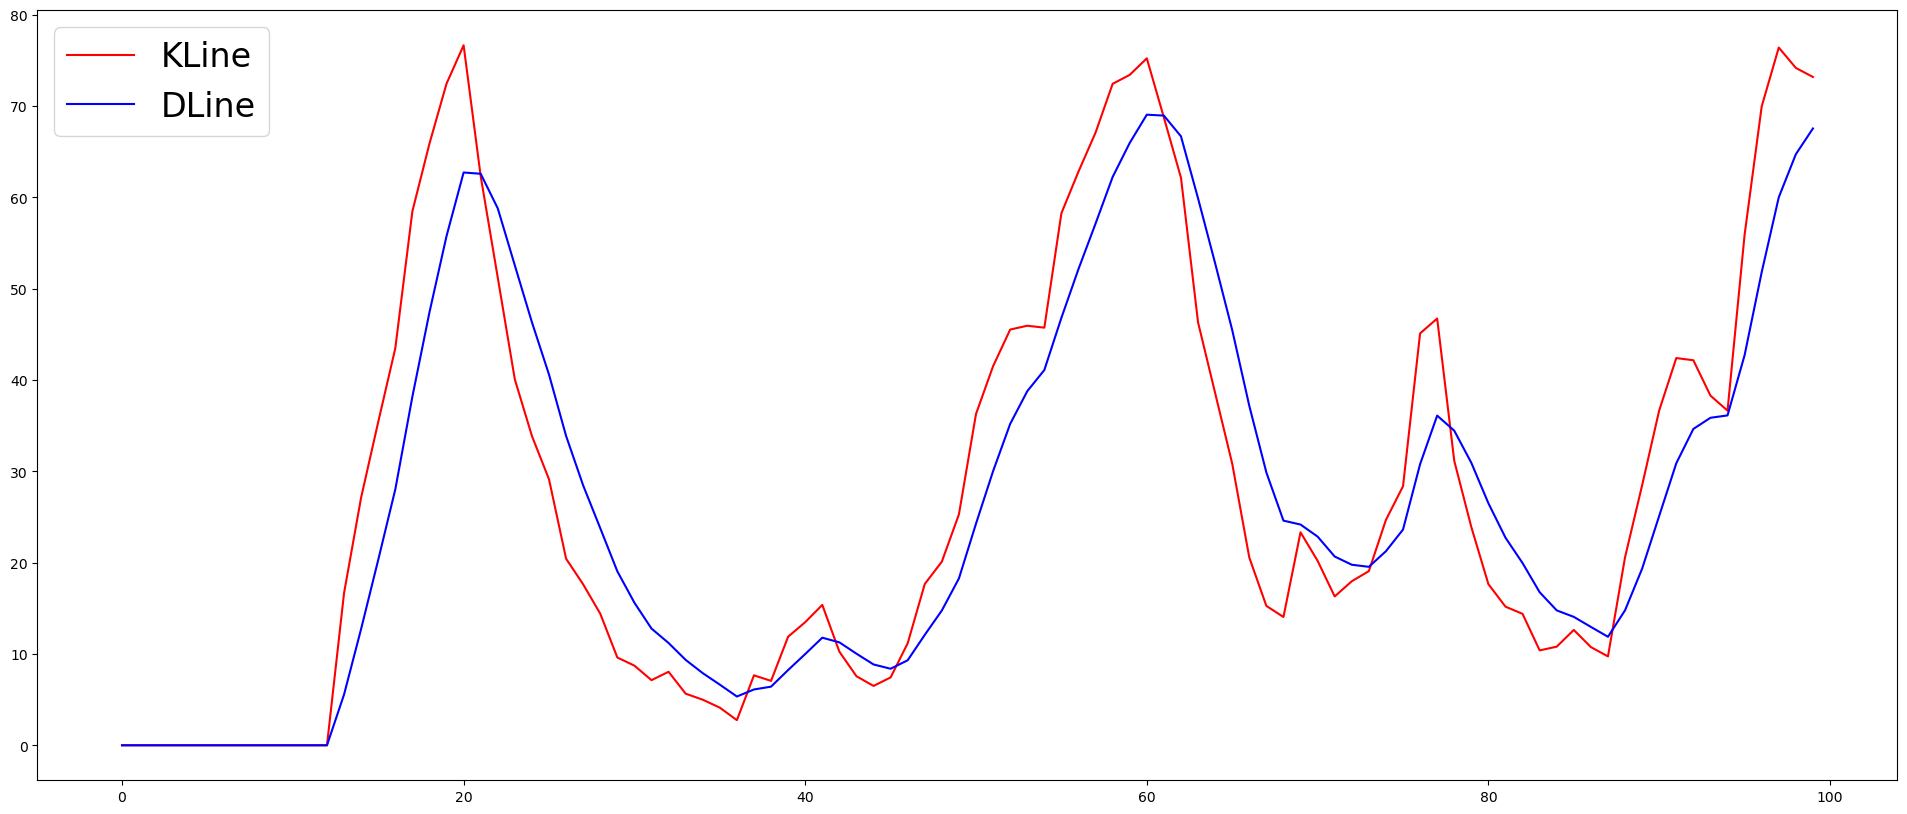

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

stocks = pd.read_csv('stocks_3169.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks.tail(100)

#KD K為快線、D為慢線
stocks_close = [float(line) for line in stocks['Close']] #收盤價
stocks_high = [float(line) for line in stocks['High']]   #最高價
stocks_low = [float(line) for line in stocks['Low']]     #最低價
rsv = []                                                 #RSV list
Kpoint = [0]                                             #K值 list
Dpoint = [0]                                             #D值 list

#最近14天的 KD指標
#計算 RSV
for i in range(13, len(stocks_close)):
    low = min(stocks_low[i-13 : i+1])
    high = max(stocks_high[i-13 : i+1])
    rsv.append(round(100 * ((stocks_close[i] - low) / (high - low)), 2))

#計算K值和D值
for i in range(0, len(rsv)):
    Kpoint.append(round((Kpoint[i] * (2 / 3) + rsv[i] * (1 / 3)), 2))
    Dpoint.append(round((Dpoint[i] * (2 / 3) + Kpoint[i + 1] * (1 / 3)), 2))

#補齊元素個數，前 8項較不重要，所以補 0
for i in range(0, 12):
    Kpoint.insert(i, 0)
    Dpoint.insert(i, 0)

plt.figure(figsize = (24, 10))
plt.plot(Kpoint, label = 'KLine', color = 'red')
plt.plot(Dpoint, label = 'DLine', color = 'blue')
plt.legend(fontsize = 24)
plt.show()

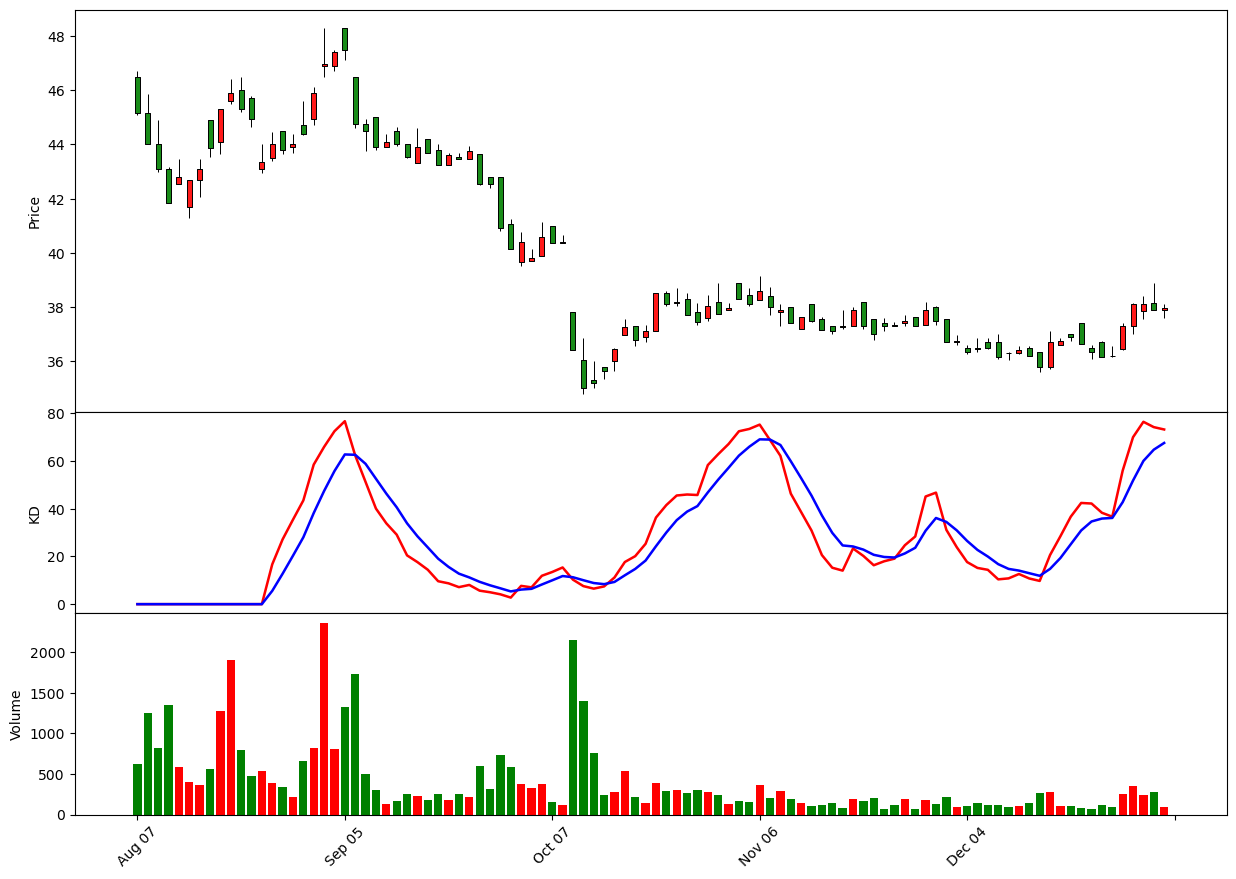

In [45]:
import pandas as pd
import mplfinance as mpf

stocks = pd.read_csv('stocks_3169.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks.tail(100)

colorSet = mpf.make_marketcolors(up = 'r', down = 'g', inherit = False)

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', style = styleSet, figscale = 2)

#KD K為快線、D為慢線
stocks_close = [float(line) for line in stocks['Close']] #收盤價
stocks_high = [float(line) for line in stocks['High']]   #最高價
stocks_low = [float(line) for line in stocks['Low']]     #最低價
rsv = []                                                 #RSV list
Kpoint = [0]                                             #K值 list
Dpoint = [0]                                             #D值 list

#最近14天的 KD指標
#計算 RSV
for i in range(13, len(stocks_close)):
    low = min(stocks_low[i-13 : i+1])
    high = max(stocks_high[i-13 : i+1])
    rsv.append(round(100 * ((stocks_close[i] - low) / (high - low)), 2))

#計算K值和D值
for i in range(0, len(rsv)):
    Kpoint.append(round((Kpoint[i] * (2 / 3) + rsv[i] * (1 / 3)), 2))
    Dpoint.append(round((Dpoint[i] * (2 / 3) + Kpoint[i + 1] * (1 / 3)), 2))

#補齊元素個數，前 13項較不重要，所以補 0
for i in range(0, 12):
    Kpoint.insert(i, 0)
    Dpoint.insert(i, 0)

#成交量分顏色
stocks_volume_red = []
stocks_volume_green = []

for i in range(0, len(stocks['Volume'])):
    if(stocks['Open'][i] < stocks['Close'][i]):
        stocks_volume_red.append(int(stocks['Volume'][i]))
    else:
        stocks_volume_red.append(0)
    if(stocks['Open'][i] >= stocks['Close'][i]):
        stocks_volume_green.append(int(stocks['Volume'][i]))
    else:
        stocks_volume_green.append(0)
    
draw = [
        mpf.make_addplot(Kpoint, panel = 1, color = 'red', ylabel = 'KD'), 
        mpf.make_addplot(Dpoint, panel = 1, color = 'blue'), 
        mpf.make_addplot(stocks_volume_red, type = 'bar', panel = 2, color = 'red', ylabel = 'Volume'),
        mpf.make_addplot(stocks_volume_green, type = 'bar', panel = 2, color = 'green')
       ]

mpf.plot(stocks, **kwargs, addplot = draw, panel_ratios = (4, 2, 2))
mpf.show()

## 1-7-2 KD 應用

### KD 使用原則



1. K值在80以上向下跌破D值為賣出訊號；K值在20以下向上突破D值為買進訊號。


2. 隨機指標KD在圖形上與股價或指數產生背離時，視為買賣訊號。 


<img src = "images/KD1.png" width = 500 height =200 align = "left">

<img src = "images/KD2.png" width = 500 height =200 align = "left">







3. 當K線出現斜度較平緩時，需注意反轉的時機。 


<img src = "images/KD3.png" width = 250 height =100 align = "left">

4. 當D值大於80，股市呈現買超，需注意回檔時機；當D值小於20，股市呈現賣超，需注意反彈時機。


5. K值跌破D值需由右邊跌破，K值突破D值需由右邊突破，否則是騙線。


<img src = "images/KD4.png" width = 500 height =100 align = "left">

6. 若9日K>9日D>20，可以買進；若9日K>9日D>50，可以加碼。


7. 若9日K<9日D<80，可以賣出；若9日K<9日D<50，出清持股。


8. K>D>20，若出現帶量紅K線是買點。K>D>50，若出現紅K線，第2次交叉向上時，同時帶量是加碼買點。


9. K>D>20，若出現第2次帶量紅K線，漲勢確定，是好買點。


10. K>D>50，若出現第2次帶量紅K線，漲勢更明顯，是加碼好買點。


11. K>D>20，而後若出現第2次交叉後的第2根帶量紅K線也是買點。反之，K<D<80、K<D<50，由高檔拉回的操作方法同於第8點～第11點。


12. 日、週、月線皆可應用，但月、週線更準確。

### KD 使用範例

-------------------------------------------------------------------------------------------------------------------------------

# 1-8 如何標記點
## 標點範例

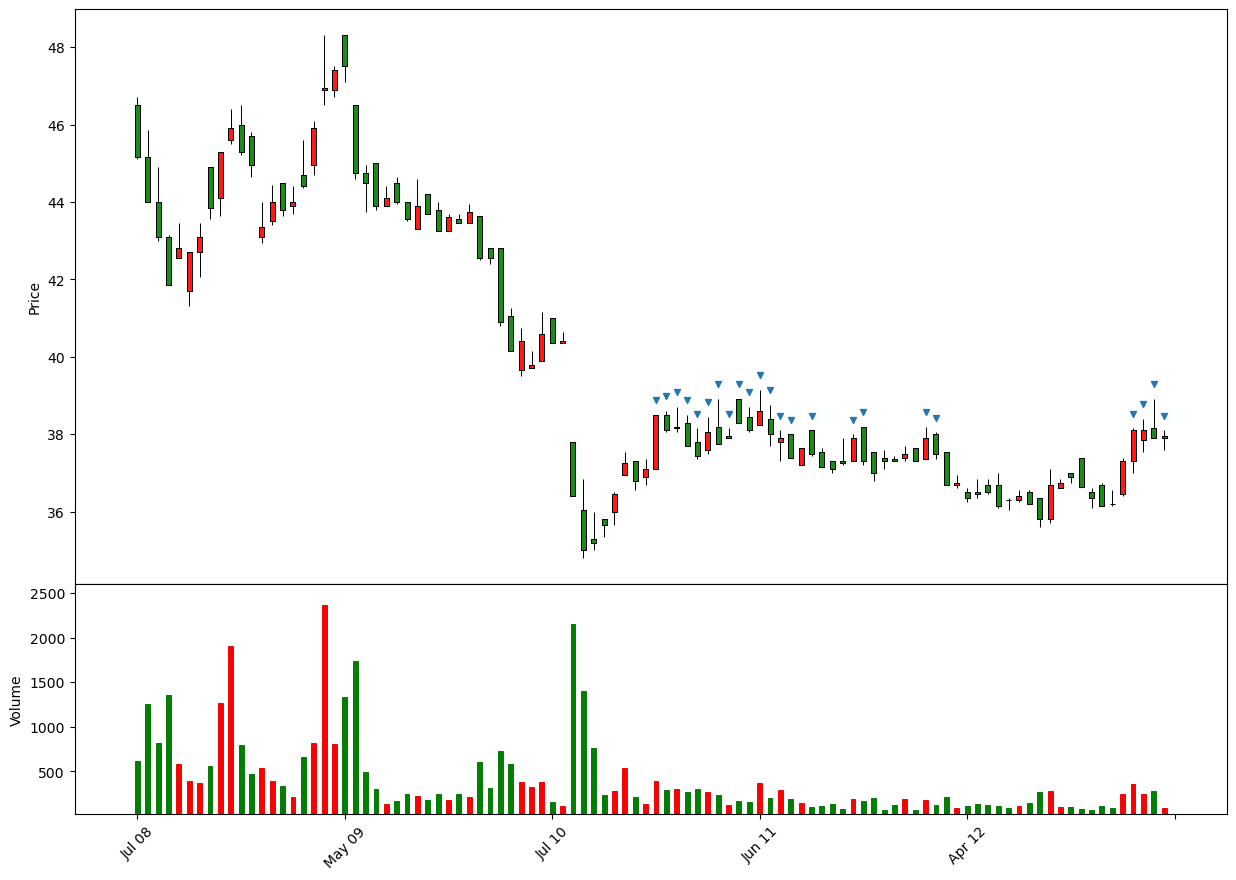

In [74]:
import numpy as np
import pandas as pd
import mplfinance as mpf

stocks = pd.read_csv('stocks_3169.csv')

stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")

stocks = stocks.tail(100)

colorSet = mpf.make_marketcolors(up = 'r', down = 'g', volume = 'inherit')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', volume = True, figscale = 2,
    style = styleSet, scale_width_adjustment = dict(volume = 0.5))

stocks_high = [float(line) for line in stocks["High"]]

#繪製點的方式
points = []
for i in range(0, len(stocks)):
    #最高價在38~40之間則標點
    if(38 <= stocks_high[i] and stocks_high[i] <= 40):
        points.append(stocks_high[i] * 1.01)
    else:
        points.append(np.nan)

#type要注意 是scatter，也有許多種 marker
addplots = mpf.make_addplot(points, type = 'scatter', marker = 'v')
        
mpf.plot(stocks, **kwargs, addplot = addplots)

In [ ]:
作業1：

以一股票（需有以下條件者），畫出其最近150天的股價K線圖、含量與KD指標，並標示出符合以下條件的買賣點：

K值在80以上向下跌破D值為賣出訊號；K值在20以下向上突破D值為買進訊號。


# 1-9 ta-lib 套件

## 安裝 ta-lib 套件
* 影音教學：https://www.youtube.com/watch?v=EDemyRWImWo
* 可參考 http://yhhuang1966.blogspot.com/2018/05/python-ta-lib.html
* https://medium.com/ai%E8%82%A1%E4%BB%94/%E7%94%A8-python-%E5%BF%AB%E9%80%9F%E8%A8%88%E7%AE%97-158-%E7%A8%AE%E6%8A%80%E8%A1%93%E6%8C%87%E6%A8%99-26f9579b8f3a

### 步驟一：查看python的版本
* 套件名稱 -V
* 套件名稱 --version
    * !python -V

### 步驟二：Talib 套件安裝
1.　從以下網站下載合適的版本到目前使用的資料夾（例如：C:\使用者）:  
   https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib

2. 安裝


* 用anaconda prompt 安裝：
    * pip install 下載下來的檔案名稱
* 在jupyter notebook中使用
    * !pip install TA_Lib‑0.4.18‑cp37‑cp37m‑win_amd64.whl （）
    

## talib 模組簡介


### talib 函式分類
* Function API
    * 依照其功能來決定輸入值，因此不同函式的輸入值可能不同
* Abstract API
    * 皆採用相同的輸入值，即股票的開盤、收盤、最高、最低、成交量等資料
    * 輸入資料格式
        * 字典（字典的value為numpy的ndarray型別）
        * pandas的dataframes型別


* 股票資料的格式：傳入Dataframe的格式的columns 名稱
    * mplfinance.plot()函式需要匯入的股票資料中，欄位名稱必須取名['Open', 'High', 'Low', 'close', 'Volume'] ，第一個字母都是要大寫
        
    * talib.abstract 模組的函式需要匯入的資料中，['open', 'high', 'low', 'close', 'volume'] 都是要小寫

In [41]:
# 移動平均線
import pandas as pd
from talib import abstract

stock = pd.read_csv('data/pd_TEJ2330.csv')
stock.columns =  ['date', 'open', 'high', 'low', 'close', 'volume']
print()
print(stock.head(100))

MAvalue = abstract.SMA(stock, 5)    # timeperiod 為日（月，或年）數的移動平均數，預設為5日
# MA5 = abstract.SMA(stock, timeperiod = 5)      # SMA5    
# MA20 = abstract.SMA(stock, timeperiod = 20)    # SMA20
# MA60 = abstract.SMA(stock, timeperiod = 60)    # SMA60
print(MAvalue[:100])


         date  open  high   low  close  volume
0    2011/1/3  71.5  71.6  70.8   71.1   35747
1    2011/1/4  71.0  71.6  70.8   71.2   36048
2    2011/1/5  70.9  71.1  69.6   69.8   54327
3    2011/1/6  69.8  71.0  69.7   71.0   46802
4    2011/1/7  71.9  73.0  71.9   72.5  170328
..        ...   ...   ...   ...    ...     ...
95  2011/5/30  74.0  75.3  74.0   75.1   33733
96  2011/5/31  75.5  76.9  75.4   76.7   62918
97   2011/6/1  76.3  77.3  76.3   77.0   45321
98   2011/6/2  76.3  77.4  76.3   76.4   61881
99   2011/6/3  77.0  77.2  76.1   77.2   36770

[100 rows x 6 columns]
0       NaN
1       NaN
2       NaN
3       NaN
4     71.12
      ...  
95    74.52
96    74.90
97    75.40
98    75.84
99    76.48
Length: 100, dtype: float64


In [54]:
# 布林通道

import pandas as pd
from talib import abstract

stock = pd.read_csv('data/pd_TEJ2330.csv')
stock.columns =  ['date', 'open', 'high', 'low', 'close', 'volume']
bband = abstract.BBANDS(stock, 10)
print("BBANDS:\n", abstract.BBANDS(stock).head(10))

print("\nupperband:\n", bband.upperband.head(20))
# bband = abstract.BBANDS(stock)  # 預設為 5日
print("\nmiddleband:\n", bband.middleband.head(20))
print("\nlowerband:\n", bband.lowerband.head(20))

# print(middle)
# print(lower)

# print(upper[:10])

# print(abstract.BBANDS(stock))
# print(stock)

BBANDS:
    upperband  middleband  lowerband
0        NaN         NaN        NaN
1        NaN         NaN        NaN
2        NaN         NaN        NaN
3        NaN         NaN        NaN
4  72.833009       71.12  69.406991
5  74.737599       71.74  68.742401
6  76.019945       72.40  68.780055
7  76.341370       73.42  70.498630
8  75.839882       74.14  72.440118
9  75.089898       74.60  74.110102

upperband:
 0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9     76.561027
10    77.207164
11    77.986291
12    78.472393
13    78.187005
14    77.825079
15    77.788197
16    77.760654
17    77.778059
18    77.757605
19    77.857183
Name: upperband, dtype: float64

middleband:
 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9     72.86
10    73.33
11    73.89
12    74.71
13    75.25
14    75.46
15    75.57
16    75.62
17    75.59


In [58]:
# RSI

import pandas as pd
from talib import abstract

stock = pd.read_csv('data/pd_TEJ2330.csv')
stock.columns =  ['date', 'open', 'high', 'low', 'close', 'volume']
bband = abstract.RSI(stock, 10)
print("BBANDS:\n", abstract.RSI(stock))

BBANDS:
 0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2338    81.308857
2339    84.203282
2340    83.430312
2341    75.247494
2342    79.066620
Length: 2343, dtype: float64


In [ ]:
# 移動平均線
import pandas as pd
from talib import abstract

stock = pd.read_csv('data/pd_TEJ2330.csv')
stock.columns =  ['date', 'open', 'high', 'low', 'close', 'volume']
print()
print(stock.head(100))

MAvalue = abstract.SMA(stock, 5)    # timeperiod 為日（月，或年）數的移動平均數，預設為5日
# MA5 = abstract.SMA(stock, timeperiod = 5)      # SMA5    
# MA20 = abstract.SMA(stock, timeperiod = 20)    # SMA20
# MA60 = abstract.SMA(stock, timeperiod = 60)    # SMA60
print(MAvalue[:100])

In [152]:
# 列出talib 所有的 Function API 

import talib

all_ta_groups = talib.get_function_groups()
# print(all_ta_groups)
for keys, indexs in all_ta_groups.items():
    print("keys:", keys)
    for index in indexs:
        print('\tindex:', index)
        

keys: Cycle Indicators
	index: HT_DCPERIOD
	index: HT_DCPHASE
	index: HT_PHASOR
	index: HT_SINE
	index: HT_TRENDMODE
keys: Math Operators
	index: ADD
	index: DIV
	index: MAX
	index: MAXINDEX
	index: MIN
	index: MININDEX
	index: MINMAX
	index: MINMAXINDEX
	index: MULT
	index: SUB
	index: SUM
keys: Math Transform
	index: ACOS
	index: ASIN
	index: ATAN
	index: CEIL
	index: COS
	index: COSH
	index: EXP
	index: FLOOR
	index: LN
	index: LOG10
	index: SIN
	index: SINH
	index: SQRT
	index: TAN
	index: TANH
keys: Momentum Indicators
	index: ADX
	index: ADXR
	index: APO
	index: AROON
	index: AROONOSC
	index: BOP
	index: CCI
	index: CMO
	index: DX
	index: MACD
	index: MACDEXT
	index: MACDFIX
	index: MFI
	index: MINUS_DI
	index: MINUS_DM
	index: MOM
	index: PLUS_DI
	index: PLUS_DM
	index: PPO
	index: ROC
	index: ROCP
	index: ROCR
	index: ROCR100
	index: RSI
	index: STOCH
	index: STOCHF
	index: STOCHRSI
	index: TRIX
	index: ULTOSC
	index: WILLR
keys: Overlap Studies
	index: BBANDS
	index: DEMA
	ind

## 參考函式如何使用

In [69]:
# 列出talib 中函式的參數、輸入與輸出的值

from talib import abstract
print(abstract.MA)
print()
print(abstract.BBANDS)
print()
print(abstract.RSI)
print()
print(abstract.MACD)

MA([input_arrays], [timeperiod=30], [matype=0])

Moving average (Overlap Studies)

Inputs:
    price: (any ndarray)
Parameters:
    timeperiod: 30
    matype: 0 (Simple Moving Average)
Outputs:
    real

BBANDS([input_arrays], [timeperiod=5], [nbdevup=2], [nbdevdn=2], [matype=0])

Bollinger Bands (Overlap Studies)

Inputs:
    price: (any ndarray)
Parameters:
    timeperiod: 5
    nbdevup: 2
    nbdevdn: 2
    matype: 0 (Simple Moving Average)
Outputs:
    upperband
    middleband
    lowerband

RSI([input_arrays], [timeperiod=14])

Relative Strength Index (Momentum Indicators)

Inputs:
    price: (any ndarray)
Parameters:
    timeperiod: 14
Outputs:
    real

MACD([input_arrays], [fastperiod=12], [slowperiod=26], [signalperiod=9])

Moving Average Convergence/Divergence (Momentum Indicators)

Inputs:
    price: (any ndarray)
Parameters:
    fastperiod: 12
    slowperiod: 26
    signalperiod: 9
Outputs:
    macd
    macdsignal
    macdhist


-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
參考資料：
吳宗正（2017）。投資技術分析。台北：華泰書局。